# 3 Univariate Data Analysis

In [1]:
# libraries
import os
import sys
import inspect
sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from shared import directories
from shared import filenames
from shared import variables

sys.path.append(directories.ANALYSIS_PATH)
import univariate
import description
import visual

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 3.1.1 Read and Inspect Data 

In [2]:
df = pd.read_csv(os.path.join(directories.INTERIM_DATA_DIR,
                              filenames.INTERIM_FILENAME),
                 encoding="Latin-1", low_memory=False)
columns = pd.read_csv(os.path.join(directories.DOCUMENTS_DIR,
                              filenames.COLUMNS_FILENAME),
                 encoding="Latin-1", low_memory=False)

### 3.1.2 Qualitative Variable Summary

In [3]:
description.describe_qual_df(df)

count unique               top  freq  missing
gender    8378      2              Male  4194        0
condtn    8378      2  Extensive Choice  6944        0
match     8378      2       Not Matched  6998        0
race_o    8378      5         Caucasian  4722        0
dec_o     8378      2                No  4863        0
field     8315    259          Business   521       63
undergra  4914    241       UC Berkeley   107     3464
race      8378      5         Caucasian  4727        0
from      8299    269          New York   522       79
zipcode   7314    409                 0   355     1064
career    8289    367           Finance   202       89
dec       8378      2                No  4860        0

### 3.1.3 Quantitative Variable Summary

In [4]:
description.describe_quant_df(df)

count  missing    min     25%        mean     50%     75%     max  \
iid       8378.0        0   1.00  154.00  283.675937  281.00  407.00  552.00   
id        8378.0        0   1.00    4.00    8.961805    8.00   13.00   22.00   
idg       8378.0        0   1.00    8.00   17.327166   16.00   26.00   44.00   
wave      8378.0        0   1.00    7.00   11.350919   11.00   15.00   21.00   
round     8378.0        0   5.00   14.00   16.872046   18.00   20.00   22.00   
position  8378.0        0   1.00    4.00    9.042731    8.00   13.00   22.00   
positin1  6532.0     1846   1.00    4.00    9.295775    9.00   14.00   22.00   
order     8378.0        0   1.00    4.00    8.927668    8.00   13.00   22.00   
pid       8378.0        0   1.00    4.00    8.963595    8.00   13.00   22.00   
piid      8378.0        0   1.00  154.00  283.677727  281.00  407.00  552.00   
int_corr  8220.0      158  -0.83   -0.02    0.196010    0.21    0.43    0.91   
samerace  8378.0        0   0.00    0.00    0.395799    0.00    1.00    1.00   
age_o     8274.0      104  18.00   24.00   26.364999   26.00   28.00   55.00   
pf_o_att  8289.0       89   0.00   15.00   22.495347   20.00   25.00  100.00   
pf_o_sin  8289.0       89   0.00   15.00   17.396867   18.37   20.00   60.00   
pf_o_int  8289.0       89   0.00   17.39   20.270759   20.00   23.81   50.00   
pf_o_fun  8280.0       98   0.00   15.00   17.459714   18.00   20.00   50.00   
pf_o_amb  8271.0      107   0.00    5.00   10.685375   10.00   15.00   53.00   
pf_o_sha  8249.0      129   0.00    9.52   11.845930   10.64   16.00   30.00   
attr_o    8166.0      212   0.00    5.00    6.190411    6.00    8.00   10.50   
sinc_o    8091.0      287   0.00    6.00    7.175256    7.00    8.00   10.00   
intel_o   8072.0      306   0.00    6.00    7.369301    7.00    8.00   10.00   
fun_o     8018.0      360   0.00    5.00    6.400599    7.00    8.00   11.00   
amb_o     7656.0      722   0.00    6.00    6.778409    7.00    8.00   10.00   
shar_o    7302.0     1076   0.00    4.00    5.474870    6.00    7.00   10.00   
like_o    8128.0      250   0.00    5.00    6.134498    6.00    7.00   10.00   
prob_o    8060.0      318   0.00    4.00    5.208251    5.00    7.00   10.00   
met_o     7993.0      385   1.00    2.00    1.960215    2.00    2.00    8.00   
age       8283.0       95  18.00   24.00   26.358928   26.00   28.00   55.00   
field_cd  8315.0       63   1.00    5.00    7.676609    8.00   10.00   18.00   
...          ...      ...    ...     ...         ...     ...     ...     ...   
amb1_3    3974.0     4404   0.00    5.00   10.898075   10.00   15.00   30.00   
shar1_3   3974.0     4404   0.00   10.00   12.699142   14.29   16.67   55.00   
attr7_3   2016.0     6362   0.00   20.00   31.330357   25.00   40.00   80.00   
sinc7_3   2016.0     6362   0.00   10.00   15.654266   15.00   20.00   60.00   
intel7_3  2016.0     6362   0.00   10.00   16.679563   18.00   20.00   45.00   
fun7_3    2016.0     6362   0.00   10.00   16.418155   17.00   20.00   40.00   
amb7_3    2016.0     6362   0.00    0.00    7.823909   10.00   10.00   30.00   
shar7_3   2016.0     6362   0.00    5.00   12.207837   10.00   20.00   55.00   
attr4_3   2959.0     5419   0.00   10.00   25.610341   20.00   37.00   80.00   
sinc4_3   2959.0     5419   0.00    7.00   10.751267   10.00   15.00   40.00   
intel4_3  2959.0     5419   0.00    7.00   11.524839   10.00   15.00   30.00   
fun4_3    2959.0     5419   0.00    9.00   14.276783   12.00   20.00   30.00   
amb4_3    2959.0     5419   0.00    5.00    9.207503    9.00   10.00   40.00   
shar4_3   2959.0     5419   0.00    7.00   11.253802   10.00   15.00   45.00   
attr2_3   2959.0     5419   5.00   10.00   24.970936   20.00   35.00   80.00   
sinc2_3   2959.0     5419   0.00    7.00   10.923285   10.00   15.00   50.00   
intel2_3  2959.0     5419   0.00    7.00   11.952687   10.00   15.00   60.00   
fun2_3    2959.0     5419   0.00    9.00   14.959108   15.00   20.00   40.00   
amb2_3    2

### 3.1.4 Analysis Detail

Unique Subject Number


count  missing  min    25%        mean    50%    75%    max   sd  skew  \
iid  8378.0        0  1.0  154.0  283.675937  281.0  407.0  552.0  0.0   0.0   

     kurtosis  normality_p          normality  
iid      -3.0          1.0  Fail to Reject H0

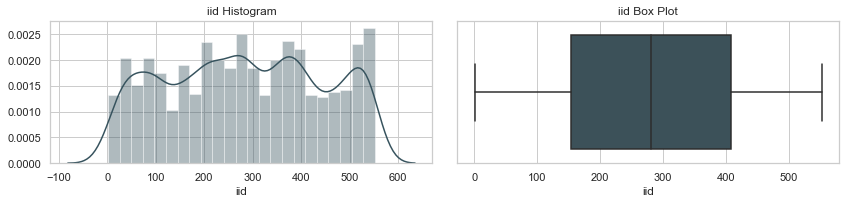

Subject Number within Wave


count  missing  min  25%      mean  50%   75%   max   sd  skew  kurtosis  \
id  8378.0        0  1.0  4.0  8.961805  8.0  13.0  22.0  0.0   0.0      -3.0   

    normality_p          normality  
id          1.0  Fail to Reject H0

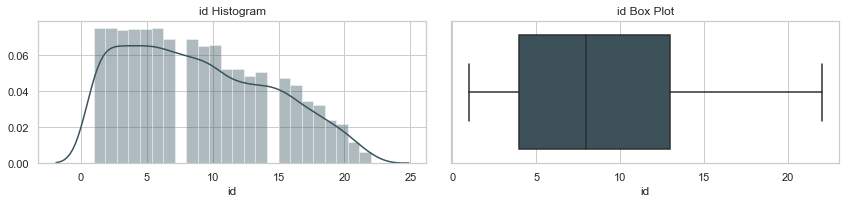

Gender


Male  Female  missing
gender  4194    4184        0

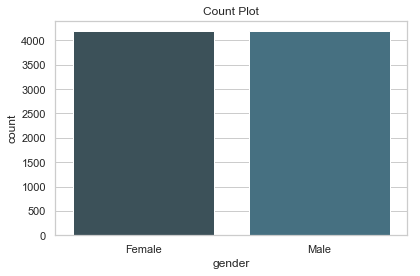

Subject Number within Gender


count  missing  min  25%       mean   50%   75%   max   sd  skew  \
idg  8378.0        0  1.0  8.0  17.327166  16.0  26.0  44.0  0.0   0.0   

     kurtosis  normality_p          normality  
idg      -3.0          1.0  Fail to Reject H0

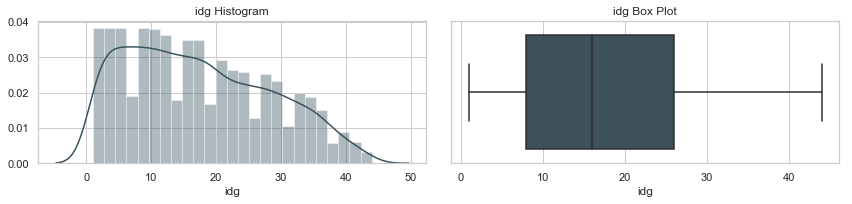

Condition


Extensive Choice  Limited Choice  missing
condtn              6944            1434        0

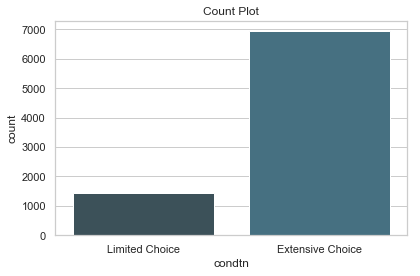

Wave


count  missing  min  25%       mean   50%   75%   max   sd  skew  \
wave  8378.0        0  1.0  7.0  11.350919  11.0  15.0  21.0  0.0   0.0   

      kurtosis  normality_p          normality  
wave      -3.0          1.0  Fail to Reject H0

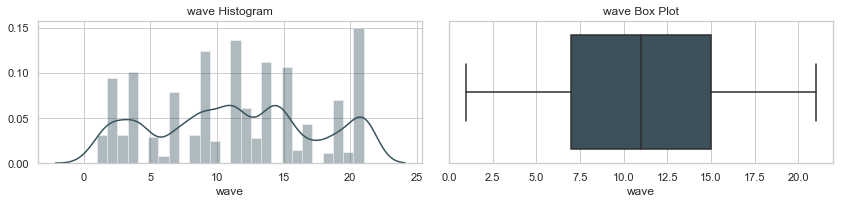

Round


count  missing  min   25%       mean   50%   75%   max   sd  skew  \
round  8378.0        0  5.0  14.0  16.872046  18.0  20.0  22.0  0.0   0.0   

       kurtosis  normality_p          normality  
round      -3.0          1.0  Fail to Reject H0

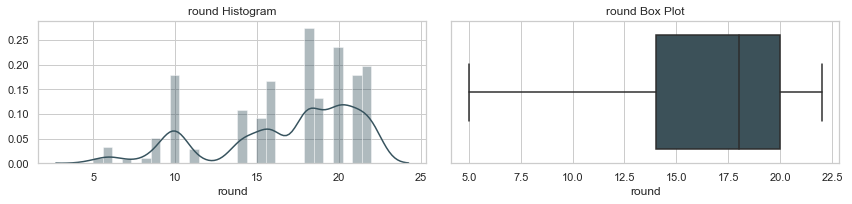

Station Number Met


count  missing  min  25%      mean  50%   75%   max   sd  skew  \
position  8378.0        0  1.0  4.0  9.042731  8.0  13.0  22.0  0.0   0.0   

          kurtosis  normality_p          normality  
position      -3.0          1.0  Fail to Reject H0

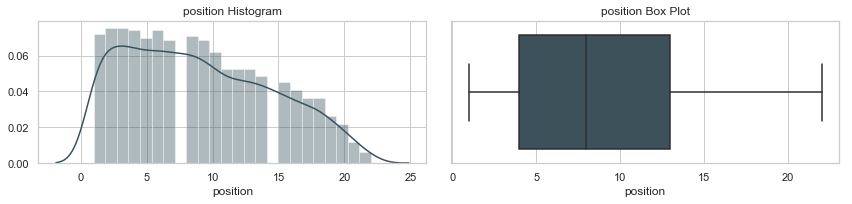

Station Number Start


count  missing  min  25%      mean  50%   75%   max        sd  \
positin1  6532.0     1846  1.0  4.0  9.295775  9.0  14.0  22.0  0.414475   

             skew  kurtosis  normality_p  normality  
positin1 -1.34947  -0.17893          0.0  Reject H0

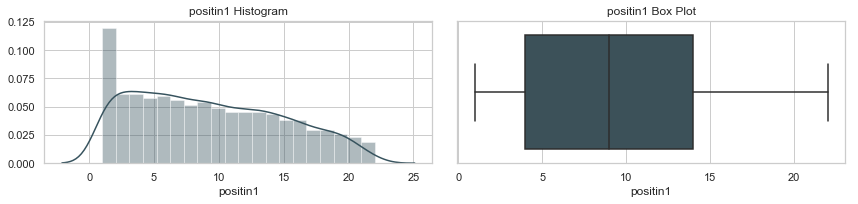

Order of Date


count  missing  min  25%      mean  50%   75%   max   sd  skew  \
order  8378.0        0  1.0  4.0  8.927668  8.0  13.0  22.0  0.0   0.0   

       kurtosis  normality_p          normality  
order      -3.0          1.0  Fail to Reject H0

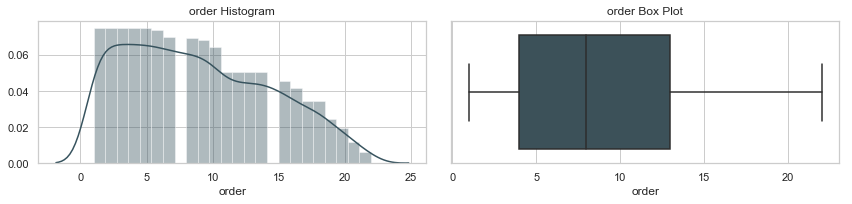

Partner's Id Number


count  missing  min  25%      mean  50%   75%   max   sd  skew  \
pid  8378.0        0  1.0  4.0  8.963595  8.0  13.0  22.0  0.0   0.0   

     kurtosis  normality_p          normality  
pid      -3.0          1.0  Fail to Reject H0

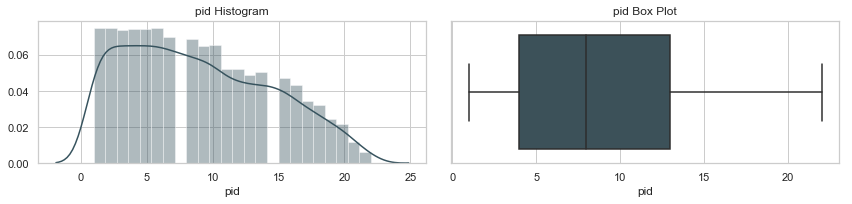

Partner's IID Number


count  missing  min  25%      mean  50%   75%   max   sd  skew  \
pid  8378.0        0  1.0  4.0  8.963595  8.0  13.0  22.0  0.0   0.0   

     kurtosis  normality_p          normality  
pid      -3.0          1.0  Fail to Reject H0

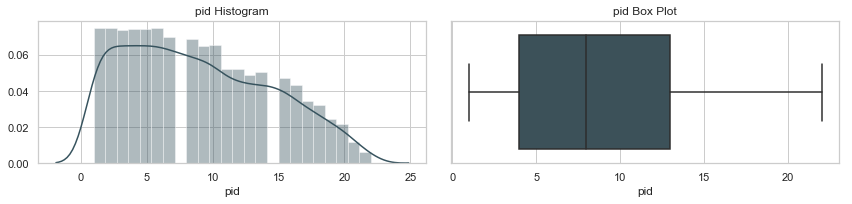

Match


Not Matched  Matched  missing
match         6998     1380        0

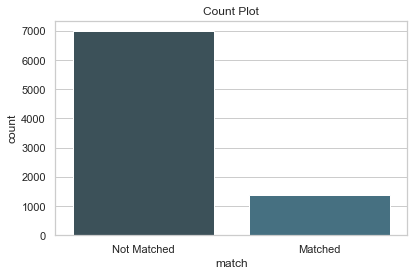

Interests Correlation


count  missing   min   25%     mean   50%   75%   max        sd  \
int_corr  8220.0      158 -0.83 -0.02  0.19601  0.21  0.43  0.91  0.136027   

              skew   kurtosis  normality_p  normality  
int_corr -7.074216  48.044538          0.0  Reject H0

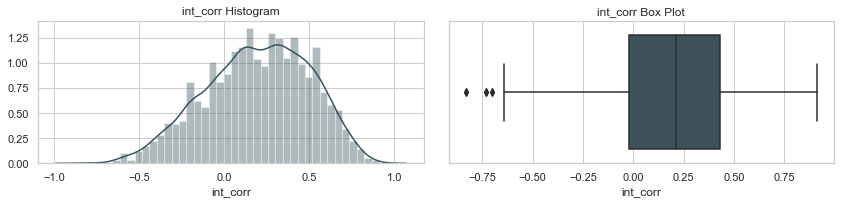

Same Race


count  missing  min  25%      mean  50%  75%  max   sd  skew  \
samerace  8378.0        0  0.0  0.0  0.395799  0.0  1.0  1.0  0.0   0.0   

          kurtosis  normality_p          normality  
samerace      -3.0          1.0  Fail to Reject H0

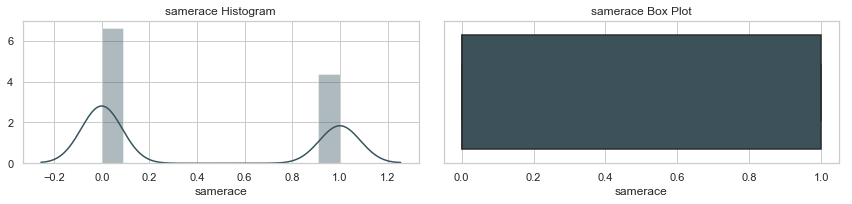

Age of Partner


count  missing   min   25%       mean   50%   75%   max        sd  \
age_o  8274.0      104  18.0  24.0  26.364999  26.0  28.0  55.0  0.110722   

           skew   kurtosis  normality_p  normality  
age_o -8.807398  75.570262          0.0  Reject H0

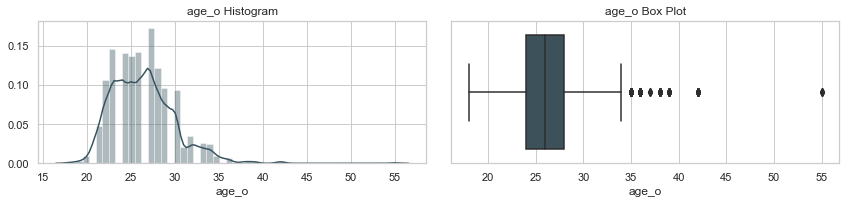

Race of Partner


Caucasian  Asian  Latino  Other  Black  missing
race_o       4722   1978     664    594    420        0

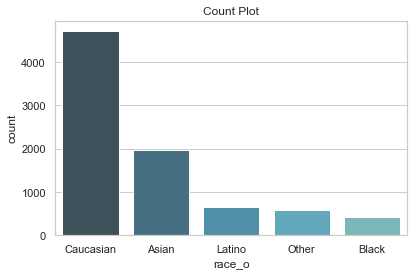

Partner Preference for Attractive - Time 1


count  missing  min   25%       mean   50%   75%    max        sd  \
pf_o_att  8289.0       89  0.0  15.0  22.495347  20.0  25.0  100.0  0.102519   

              skew   kurtosis  normality_p  normality  
pf_o_att -9.547019  89.145569          0.0  Reject H0

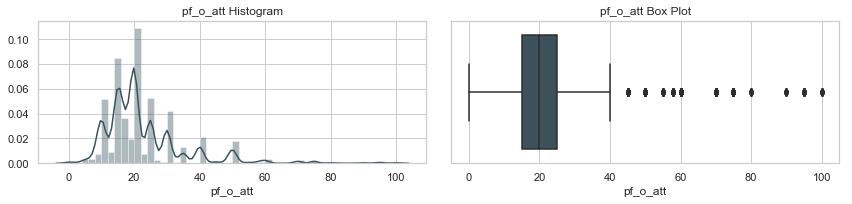

Partner Preference for Sincerity - Time 1


count  missing  min   25%       mean    50%   75%   max        sd  \
pf_o_sin  8289.0       89  0.0  15.0  17.396867  18.37  20.0  60.0  0.102519   

              skew   kurtosis  normality_p  normality  
pf_o_sin -9.547019  89.145569          0.0  Reject H0

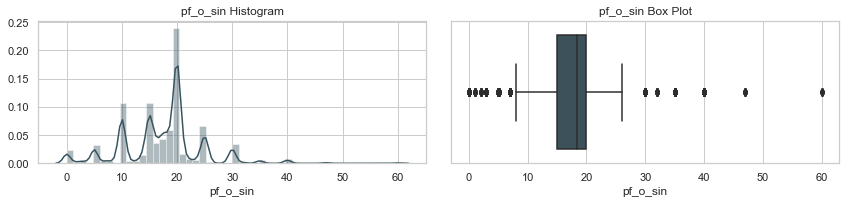

Partner Preference for Intelligence - Time 1


count  missing  min    25%       mean   50%    75%   max        sd  \
pf_o_int  8289.0       89  0.0  17.39  20.270759  20.0  23.81  50.0  0.102519   

              skew   kurtosis  normality_p  normality  
pf_o_int -9.547019  89.145569          0.0  Reject H0

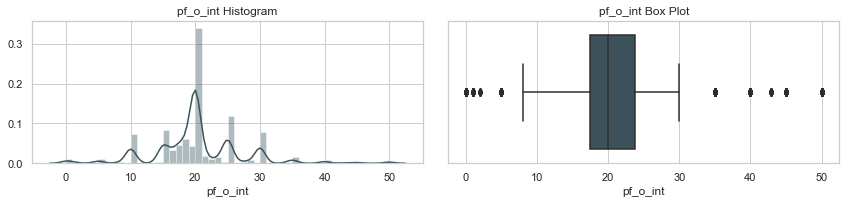

Partner Preference for Funny - Time 1


count  missing  min   25%       mean   50%   75%   max       sd  \
pf_o_fun  8280.0       98  0.0  15.0  17.459714  18.0  20.0  50.0  0.10752   

              skew   kurtosis  normality_p  normality  
pf_o_fun -9.083041  80.501632          0.0  Reject H0

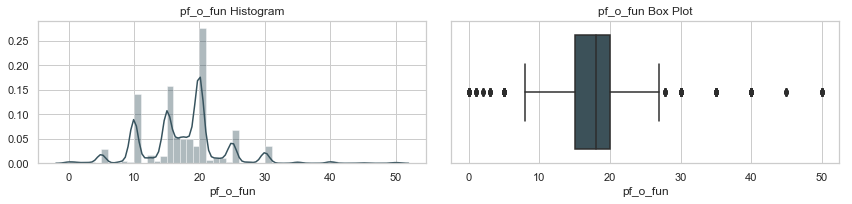

Partner Preference for Ambition - Time 1


count  missing  min  25%       mean   50%   75%   max        sd  \
pf_o_amb  8271.0      107  0.0  5.0  10.685375  10.0  15.0  53.0  0.112287   

              skew   kurtosis  normality_p  normality  
pf_o_amb -8.678249  73.312002          0.0  Reject H0

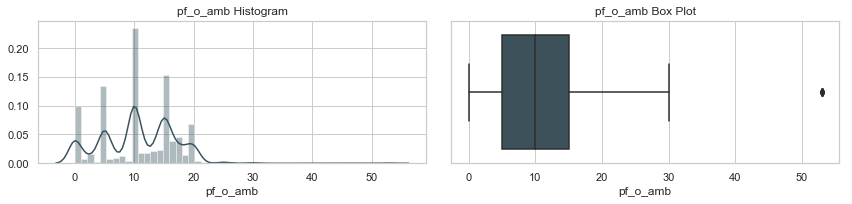

Partner Preference for Shared Interests - Time 1


count  missing  min   25%      mean    50%   75%   max        sd  \
pf_o_sha  8249.0      129  0.0  9.52  11.84593  10.64  16.0  30.0  0.123128   

              skew   kurtosis  normality_p  normality  
pf_o_sha -7.871555  59.961375          0.0  Reject H0

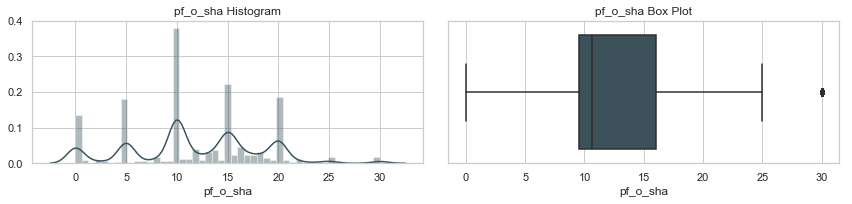

Partner Decision


No   Yes  missing
dec_o  4863  3515        0

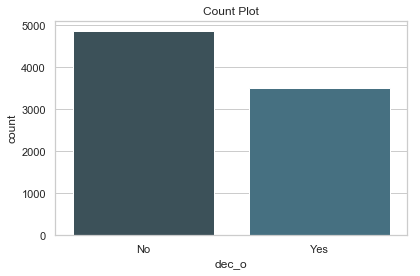

Partner Rating of Subject on Attractive - NoE


count  missing  min  25%      mean  50%  75%   max        sd  \
attr_o  8166.0      212  0.0  5.0  6.190411  6.0  8.0  10.5  0.157048   

            skew   kurtosis  normality_p  normality  
attr_o -6.045232  34.544829          0.0  Reject H0

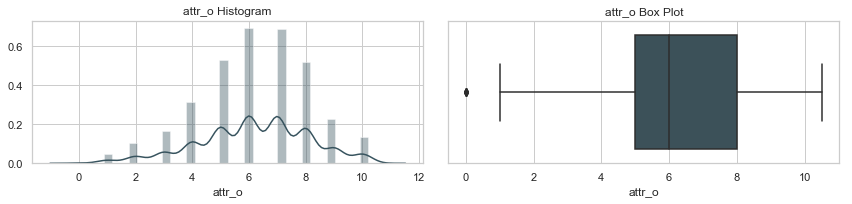

Partner Rating of Subject on Sincerity - NoE


count  missing  min  25%      mean  50%  75%   max        sd  \
sinc_o  8091.0      287  0.0  6.0  7.175256  7.0  8.0  10.0  0.181887   

            skew   kurtosis  normality_p  normality  
sinc_o -5.121241  24.227109          0.0  Reject H0

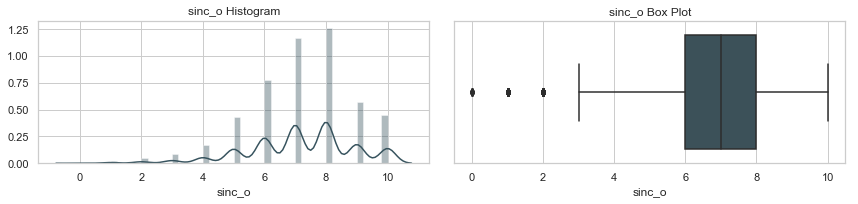

Partner Rating of Subject on Intelligence - NoE


count  missing  min  25%      mean  50%  75%   max        sd  \
intel_o  8072.0      306  0.0  6.0  7.369301  7.0  8.0  10.0  0.187591   

             skew   kurtosis  normality_p  normality  
intel_o -4.941355  22.416994          0.0  Reject H0

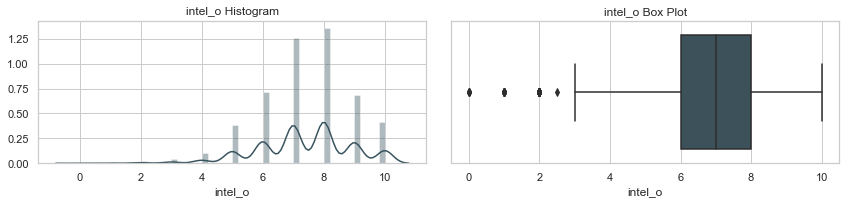

Partner Rating of Subject on Funny - NoE


count  missing  min  25%      mean  50%  75%   max        sd  \
fun_o  8018.0      360  0.0  5.0  6.400599  7.0  8.0  11.0  0.202789   

           skew   kurtosis  normality_p  normality  
fun_o -4.507452  18.317121          0.0  Reject H0

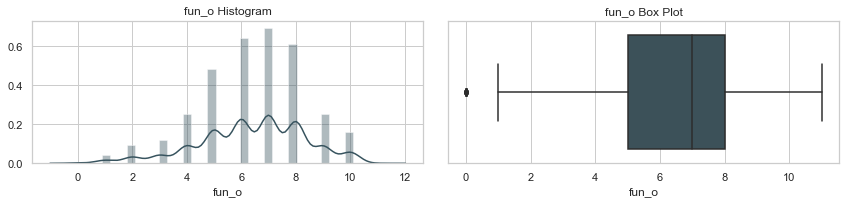

Partner Rating of Subject on Ambition - NoE


count  missing  min  25%      mean  50%  75%   max        sd  \
amb_o  7656.0      722  0.0  6.0  6.778409  7.0  8.0  10.0  0.280627   

           skew  kurtosis  normality_p  normality  
amb_o -2.949268  6.698183          0.0  Reject H0

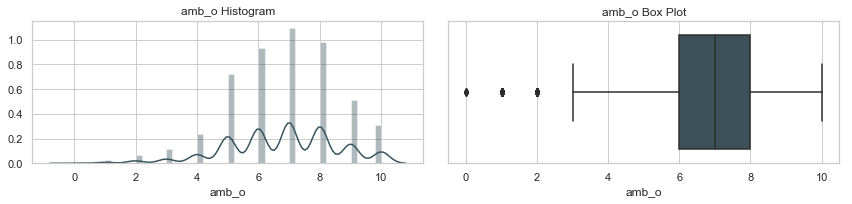

Partner Rating of Subject on Shared Interests - NoE


count  missing  min  25%     mean  50%  75%   max       sd      skew  \
shar_o  7302.0     1076  0.0  4.0  5.47487  6.0  7.0  10.0  0.33457 -2.221171   

        kurtosis  normality_p  normality  
shar_o  2.933602          0.0  Reject H0

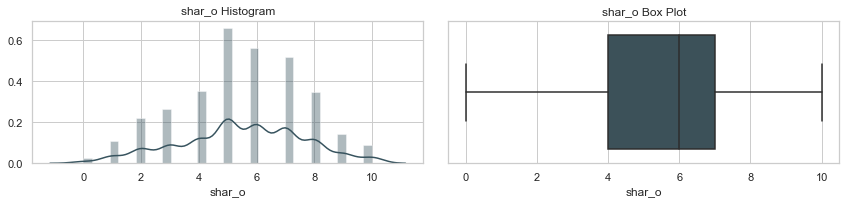

Like


count  missing  min  25%      mean  50%  75%   max        sd  \
like_o  8128.0      250  0.0  5.0  6.134498  6.0  7.0  10.0  0.170146   

           skew   kurtosis  normality_p  normality  
like_o -5.52655  28.542758          0.0  Reject H0

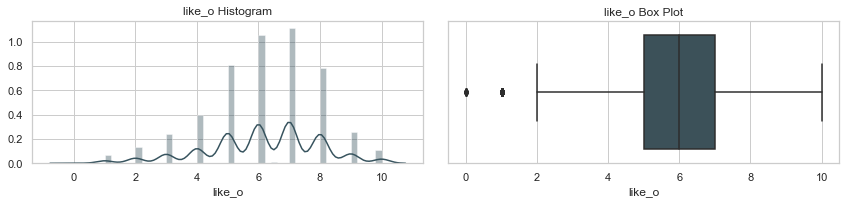

Probability Partner says Yes


count  missing  min  25%      mean  50%  75%   max        sd  \
prob_o  8060.0      318  0.0  4.0  5.208251  5.0  7.0  10.0  0.191091   

            skew   kurtosis  normality_p  normality  
prob_o -4.835842  21.385366          0.0  Reject H0

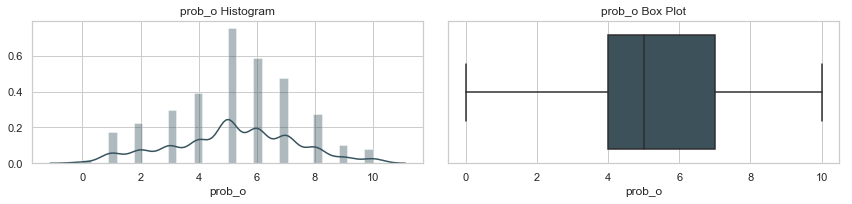

Has Subject Met Partner Before


count  missing  min  25%      mean  50%  75%  max        sd      skew  \
met_o  7993.0      385  1.0  2.0  1.960215  2.0  2.0  8.0  0.209385 -4.336958   

        kurtosis  normality_p  normality  
met_o  16.809206          0.0  Reject H0

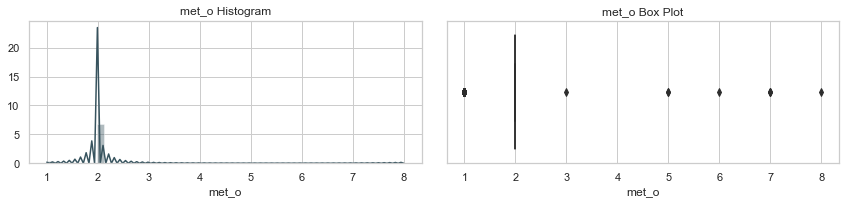

Age of Subject


count  missing   min   25%       mean   50%   75%   max       sd  \
age  8283.0       95  18.0  24.0  26.358928  26.0  28.0  55.0  0.10588   

         skew   kurtosis  normality_p  normality  
age -9.230436  83.200943          0.0  Reject H0

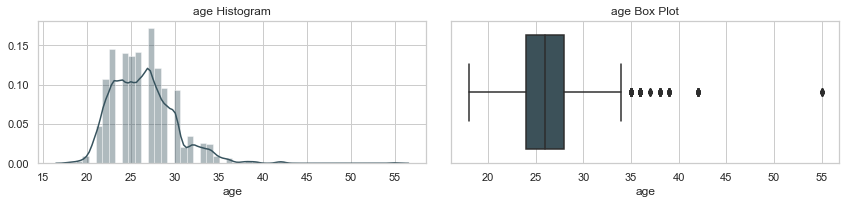

Field of Subject


field
Business                              521
MBA                                   468
Law                                   462
Social Work                           378
International Affairs                 252
Electrical Engineering                164
Psychology                            139
law                                   123
Finance                               113
business                              110
Mathematics                            95
Film                                   92
Sociology                              88
Biology                                85
Engineering                            81
Business (MBA)                         77
Clinical Psychology                    76
Biochemistry                           70
Political Science                      69
Economics                              67
chemistry                              57
Operations Research                    56
Physics                                56
School Psychology                      56
Education                              55
medicine                               52
sociology                              52
Mechanical Engineering                 51
Urban Planning                         50
Computer Science                       48
...                                   ...
Earth and Environmental Science         9
Sociology and Education                 9
Japanese Literature                     9
Early Childhood Education               9
American Studies                        9
Anthropology                            9
Instructional Tech & Media              9
Philosophy (Ph.D.)                      9
MA in Quantitative Methods              9
Conservation biology                    9
SIPA / MIA                              9
Arts Administration                     9
English Education                       9
elementary education                    9
Instructional Media and Technology      9
art education                           9
biochemistry/genetics                   7
epidemiology                            7
Biology PhD                             7
art history                             6
Stats                                   6
MFA  Poetry                             6
biomedical informatics                  6
Fundraising Management                  6
math of finance                         6
Business (Finance & Marketing)          6
SOA -- writing                          6
marine geophysics                       5
theory                                  5
missing                                63

[260 rows x 1 columns]

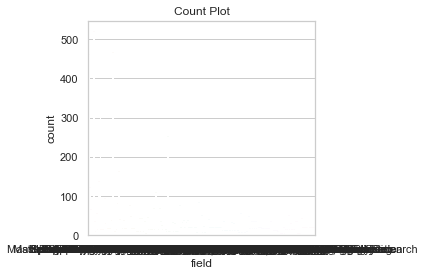

Field Code of Subject


count  missing  min  25%      mean  50%   75%   max       sd  \
field_cd  8315.0       63  1.0  5.0  7.676609  8.0  10.0  18.0  0.08639   

              skew    kurtosis  normality_p  normality  
field_cd -11.40139  127.991704          0.0  Reject H0

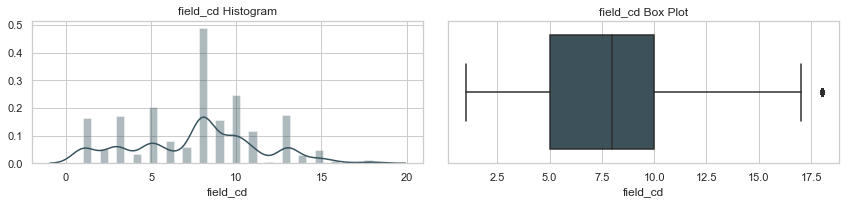

Undergraduate Institution Attended


undergra
UC Berkeley                                     107
Harvard                                         104
Columbia                                         95
Yale                                             86
NYU                                              78
Brown                                            66
UCLA                                             66
Cornell University                               64
Smith College                                    59
Tufts University                                 47
Cornell                                          44
Columbia College                                 44
Rutgers College                                  43
Columbia University                              43
University of Toronto                            43
Barnard College                                  42
University of Pennsylvania                       41
Wesleyan University                              40
Harvard University                               35
University of Michigan                           34
Penn State University                            33
University of Vermont                            33
Connecticut College                              31
University of Washington                         30
Florida International University                 30
Brown University                                 30
Tufts                                            30
Delhi University                                 29
Holy Cross                                       28
Princeton                                        28
...                                             ...
Fu Jen Catholic University, Taiwan                9
Yale University                                   9
Univ. of Connecticut                              9
Notre Dame                                        8
Bennington College                                8
CSUN                                              8
University of Heidelberg                          8
Wake Forest                                       7
Purdue                                            7
Case Western Reserve University                   7
University of Massachusetts-Amherst               7
Vanderbilt University                             7
Fudan                                             6
John Hopkins                                      6
University of California at Santa Cruz            6
University of Chicago                             6
China                                             6
University of Florida                             6
Kettering University / GMI                        6
medicine                                          6
Ateneo de Manila University - Philippines         6
oberlin                                           6
Duquesne University                               6
Yeshiva University                                6
Bombay, India                                     6
National University Of Singapore                  6
UCSB                                              6
Rice University                                   6
University of Rochester                           6
missing                                        3464

[242 rows x 1 columns]

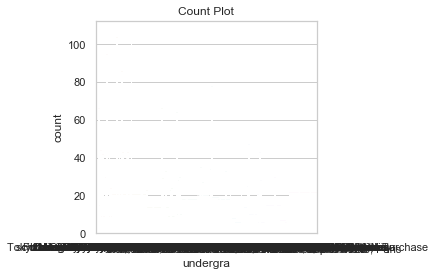

Median SAT for Undergraduate Institution


count  missing    min     25%         mean     50%     75%     max  \
mn_sat  3133.0     5245  914.0  1214.0  1299.655282  1310.0  1400.0  1490.0   

              sd      skew  kurtosis  normality_p  normality  
mn_sat  0.483852  0.521004 -1.728555          0.0  Reject H0

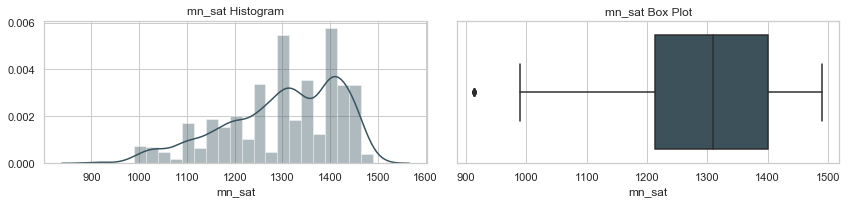

Tuition at Undergraduate Institution


count  missing     min      25%         mean      50%      75%  \
tuition  3583.0     4795  2406.0  15162.0  21174.92604  25020.0  26562.0   

             max       sd      skew  kurtosis  normality_p  normality  
tuition  34300.0  0.49474  0.292405 -1.914499          0.0  Reject H0

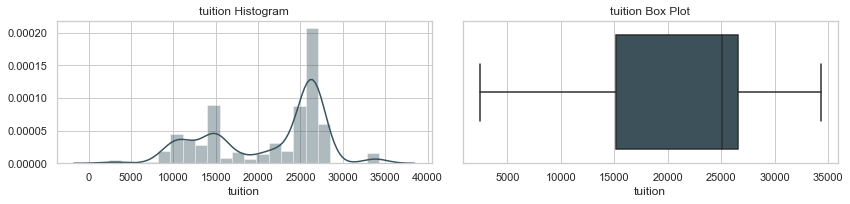

Race of Subject


Caucasian  Asian  Latino  Other  Black  missing
race       4727   1982     664    585    420        0

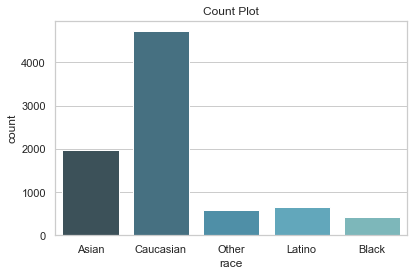

Importance Same Race


count  missing  min  25%      mean  50%  75%   max        sd  \
imprace  8299.0       79  0.0  1.0  3.784793  3.0  6.0  10.0  0.096646   

              skew    kurtosis  normality_p  normality  
imprace -10.151855  101.060152          0.0  Reject H0

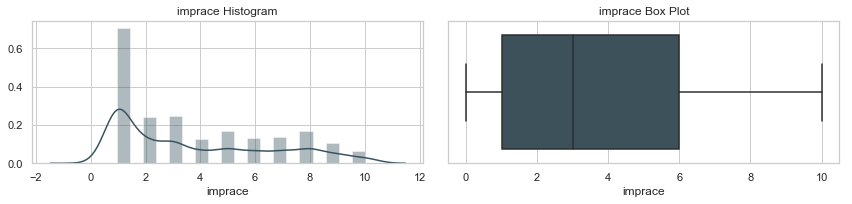

Importance Same Religion


count  missing  min  25%      mean  50%  75%   max        sd  \
imprelig  8299.0       79  1.0  1.0  3.651645  3.0  6.0  10.0  0.096646   

               skew    kurtosis  normality_p  normality  
imprelig -10.151855  101.060152          0.0  Reject H0

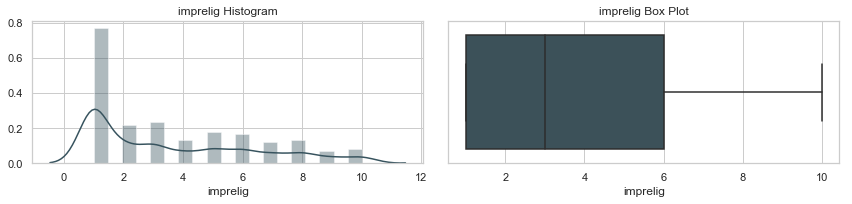

From


from
New York                                             522
New Jersey                                           365
California                                           301
China                                                139
Italy                                                132
New York City                                        130
Boston                                               123
Texas                                                120
NYC                                                  109
India                                                107
Maryland                                             106
Israel                                               104
Taiwan                                               103
Chicago                                               95
Washington, DC                                        87
Spain                                                 87
France                                                86
San Francisco                                         84
Philadelphia                                          82
Germany                                               80
Mexico                                                74
NJ                                                    72
Los Angeles                                           71
Connecticut                                           70
Russia                                                64
Pennsylvania                                          64
Brooklyn, NY                                          63
Miami                                                 63
Long Island                                           61
Minnesota                                             60
...                                                  ...
brooklyn ny                                           10
Bogota, Colombia                                      10
Toronto, London, India                                 9
brooklyn, ny                                           9
USA/American                                           9
Erie, PA                                               9
Great Neck, NY                                         9
Lexington, MA                                          9
lOS aNGELES                                            9
Portland, Oregon                                       9
uruguay                                                9
Westchester, new York                                  9
Born in Montana, raised in South Jersey (nr. Ph...     9
California (West Coast)                                9
Tokyo and Texas                                        9
Greece/Germany                                         8
Upstate New York                                       7
Boston, Ma                                             7
Kansas City, Missouri                                  7
Santa Barbara, California                              6
Manila, Philippines                                    6
india                                                  6
Pittsburgh, PA                                         6
TN                                                     6
Pougkeepsie NY                                         5
Europe                                                 5
china                                                  5
sofia, bg                                              5
Greenwich, CT                                          5
missing                                               79

[270 rows x 1 columns]

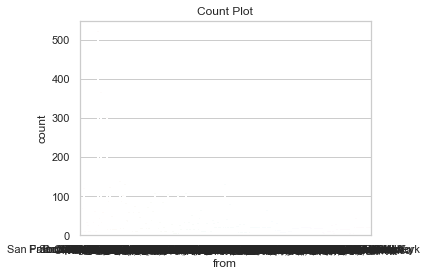

Zipcode From


zipcode
0            355
10,021       139
10,027       128
10,025       121
19,087        48
92,064        41
7,410         41
11,235        39
10,012        39
10,128        37
91,011        37
80,131        36
7,726         34
20,817        34
10,019        32
8,904         31
7,936         31
60,521        30
10,028        29
8,820         26
95,831        22
94,121        22
26,223        22
33,418        22
2,420         22
78,666        22
90,034        22
94,536        22
11,570        22
67,111        22
...          ...
47,906         7
64,129         7
10,605         7
12,603         7
1,742          7
2,138          6
10,804         6
7,030          6
33,021         6
15,146         6
20,782         6
90,272         6
95,060         6
11,432         6
248,001        6
90,620         6
560,032        6
93,108         6
32,304         6
94,941         6
20,853         6
200,000        6
597,627        6
20,854         6
12,590         5
519,000        5
11,020         5
10,803         5
96,822         5
missing     1064

[410 rows x 1 columns]

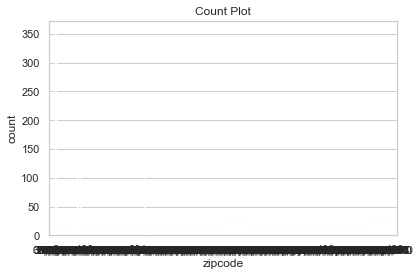

Income 1990 Based on Zipcode


count  missing     min      25%         mean      50%      75%  \
income  4279.0     4099  8607.0  31516.0  44887.60645  43185.0  54303.0   

             max        sd     skew  kurtosis  normality_p  normality  
income  109031.0  0.499885 -0.04298 -1.998153          0.0  Reject H0

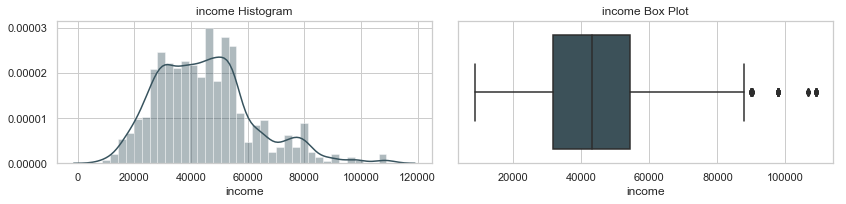

Goal of Participation


count  missing  min  25%      mean  50%  75%  max        sd       skew  \
goal  8299.0       79  1.0  1.0  2.122063  2.0  2.0  6.0  0.096646 -10.151855   

        kurtosis  normality_p  normality  
goal  101.060152          0.0  Reject H0

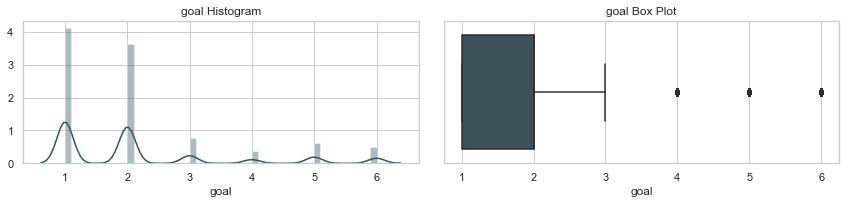

Frequency of Dates


count  missing  min  25%      mean  50%  75%  max        sd      skew  \
date  8281.0       97  1.0  4.0  5.006762  5.0  6.0  7.0  0.106976 -9.131421   

       kurtosis  normality_p  normality  
date  81.382848          0.0  Reject H0

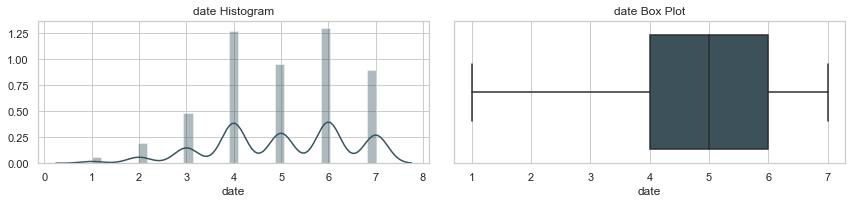

Frequency of Going Out


count  missing  min  25%      mean  50%  75%  max        sd  \
go_out  8299.0       79  1.0  1.0  2.158091  2.0  3.0  7.0  0.096646   

             skew    kurtosis  normality_p  normality  
go_out -10.151855  101.060152          0.0  Reject H0

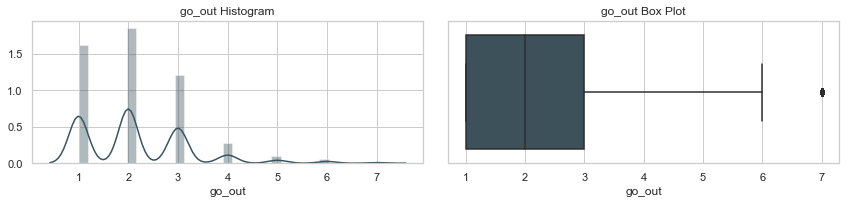

Intended Career


career
Finance                                          202
professor                                        199
Lawyer                                           154
Professor                                        148
Consulting                                       147
Social Worker                                    136
Law                                              121
Business                                         103
Academic                                         101
Scientist                                         91
lawyer                                            85
Investment Banking                                84
Social Work                                       78
law                                               77
Writer                                            77
undecided                                         75
Entrepreneur                                      73
research                                          68
Actress                                           66
academia                                          61
Management Consulting                             58
consulting                                        57
Engineer                                          56
Researcher                                        55
business                                          54
Banking                                           53
Clinical Psychologist                             52
Teacher                                           50
International Development                         50
School Psychologist                               47
...                                              ...
Wall Street Economist                              9
Early Childhood Ed. - College/univ. faculity       9
Management Consultant                              9
professor, poet/critic                             9
Social Work Policy                                 8
biology industry                                   7
researcher                                         7
epidemiologist                                     7
consultant                                         6
unsure                                             6
Lobbyist                                           6
Professor, or Engineer                             6
Not sure yet                                       6
playing music                                      6
Writer/Editor                                      6
Money Management                                   6
Fundraising for Non-Profits                        6
writer                                             6
Energy                                             6
Fixed Income Sales & Trading                       6
General Management                                 6
physician, informaticist                           6
Health care finance                                6
Entrepreneurship                                   6
teaching                                           5
engineering professional                           5
Asset Management                                   5
a research position                                5
MBA                                                5
missing                                           89

[368 rows x 1 columns]

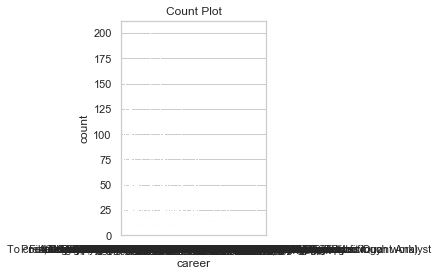

Intended Career Code


count  missing  min  25%      mean  50%  75%   max   sd  skew  \
career_c  8378.0        0  1.0  2.0  5.341848  6.0  7.0  17.0  0.0   0.0   

          kurtosis  normality_p          normality  
career_c      -3.0          1.0  Fail to Reject H0

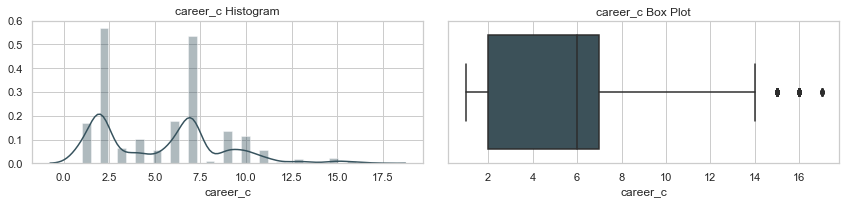

Interest in Sports


count  missing  min  25%      mean  50%  75%   max        sd  \
sports  8299.0       79  1.0  4.0  6.425232  7.0  9.0  10.0  0.096646   

             skew    kurtosis  normality_p  normality  
sports -10.151855  101.060152          0.0  Reject H0

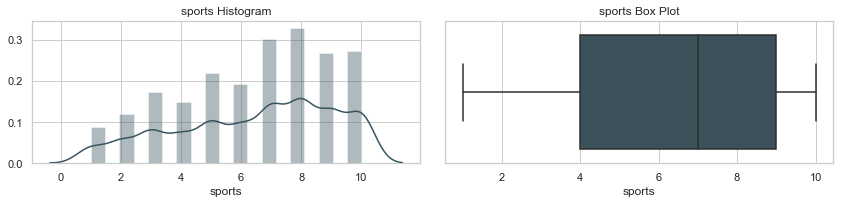

Interest in TV Sports


count  missing  min  25%      mean  50%  75%   max        sd  \
tvsports  8299.0       79  1.0  2.0  4.575491  4.0  7.0  10.0  0.096646   

               skew    kurtosis  normality_p  normality  
tvsports -10.151855  101.060152          0.0  Reject H0

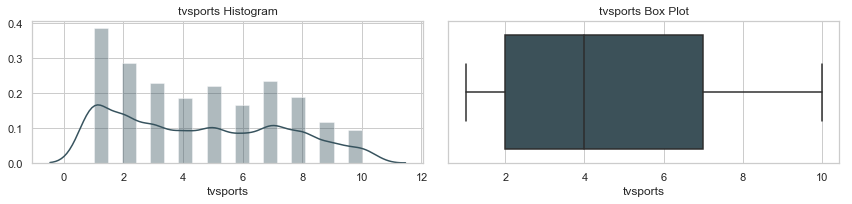

Interest in Exercise


count  missing  min  25%      mean  50%  75%   max        sd  \
exercise  8299.0       79  1.0  5.0  6.245813  6.0  8.0  10.0  0.096646   

               skew    kurtosis  normality_p  normality  
exercise -10.151855  101.060152          0.0  Reject H0

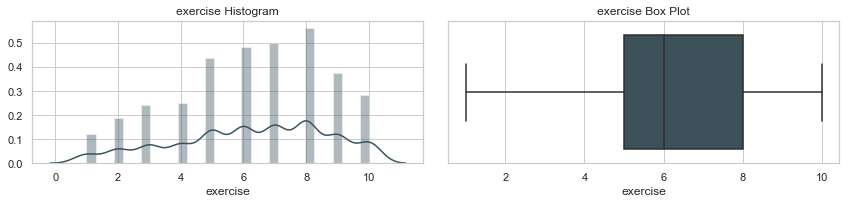

Interest in Dining


count  missing  min  25%      mean  50%  75%   max        sd  \
dining  8299.0       79  1.0  7.0  7.783829  8.0  9.0  10.0  0.096646   

             skew    kurtosis  normality_p  normality  
dining -10.151855  101.060152          0.0  Reject H0

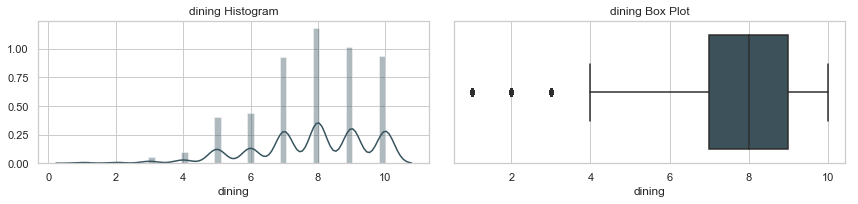

Interest in Museums


count  missing  min  25%      mean  50%  75%   max        sd  \
museums  8299.0       79  0.0  6.0  6.985781  7.0  9.0  10.0  0.096646   

              skew    kurtosis  normality_p  normality  
museums -10.151855  101.060152          0.0  Reject H0

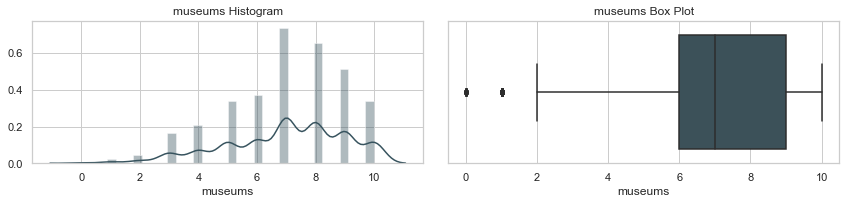

Interest in Art


count  missing  min  25%      mean  50%  75%   max        sd       skew  \
art  8299.0       79  0.0  5.0  6.714544  7.0  8.0  10.0  0.096646 -10.151855   

       kurtosis  normality_p  normality  
art  101.060152          0.0  Reject H0

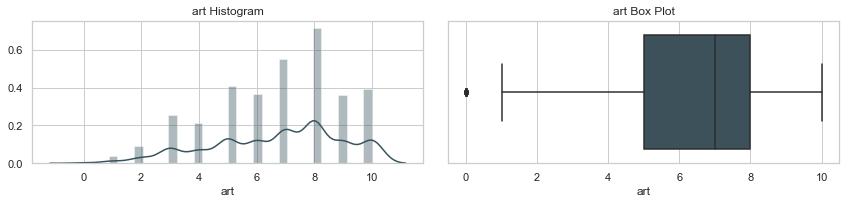

Interest in Hiking


count  missing  min  25%      mean  50%  75%   max        sd  \
hiking  8299.0       79  0.0  4.0  5.737077  6.0  8.0  10.0  0.096646   

             skew    kurtosis  normality_p  normality  
hiking -10.151855  101.060152          0.0  Reject H0

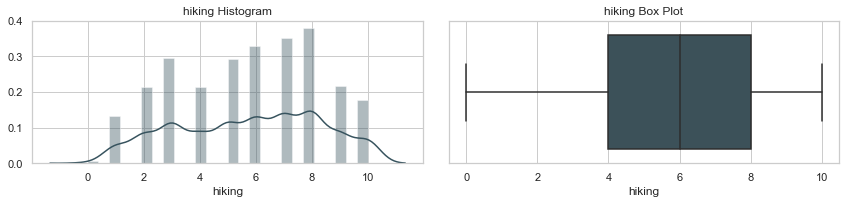

Interest in Gaming


count  missing  min  25%      mean  50%  75%   max        sd  \
gaming  8299.0       79  0.0  2.0  3.881191  3.0  6.0  14.0  0.096646   

             skew    kurtosis  normality_p  normality  
gaming -10.151855  101.060152          0.0  Reject H0

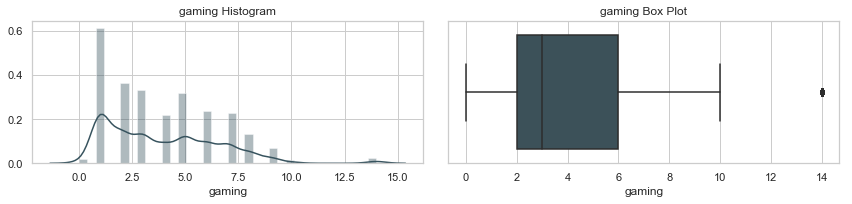

Interest in Clubbing


count  missing  min  25%      mean  50%  75%   max        sd  \
clubbing  8299.0       79  0.0  4.0  5.745993  6.0  8.0  10.0  0.096646   

               skew    kurtosis  normality_p  normality  
clubbing -10.151855  101.060152          0.0  Reject H0

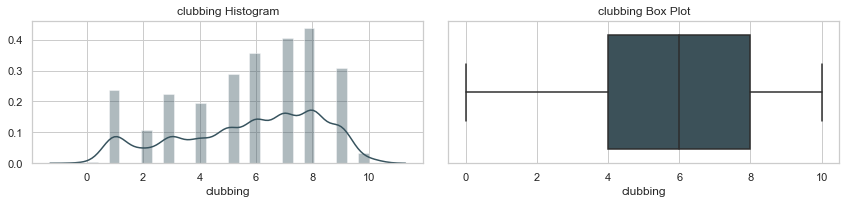

Interest in Reading


count  missing  min  25%      mean  50%  75%   max        sd  \
reading  8299.0       79  1.0  7.0  7.678515  8.0  9.0  13.0  0.096646   

              skew    kurtosis  normality_p  normality  
reading -10.151855  101.060152          0.0  Reject H0

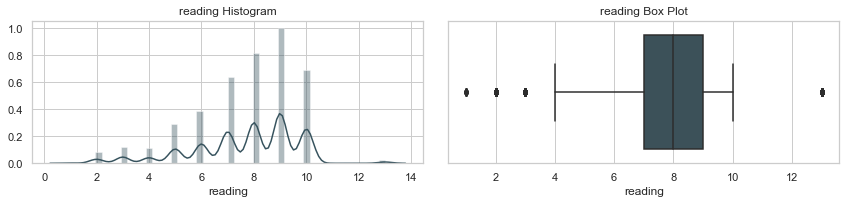

Interest in Tv


count  missing  min  25%      mean  50%  75%   max        sd       skew  \
tv  8299.0       79  1.0  3.0  5.304133  6.0  7.0  10.0  0.096646 -10.151855   

      kurtosis  normality_p  normality  
tv  101.060152          0.0  Reject H0

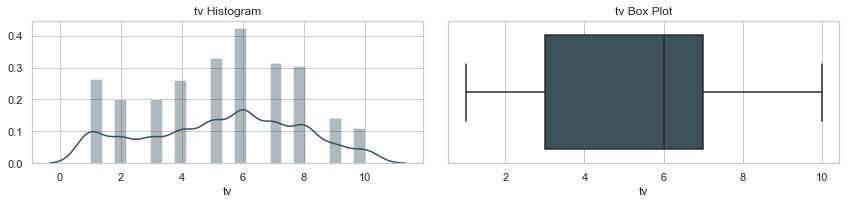

Interest in Theater


count  missing  min  25%      mean  50%  75%   max        sd  \
theater  8299.0       79  0.0  5.0  6.776118  7.0  9.0  10.0  0.096646   

              skew    kurtosis  normality_p  normality  
theater -10.151855  101.060152          0.0  Reject H0

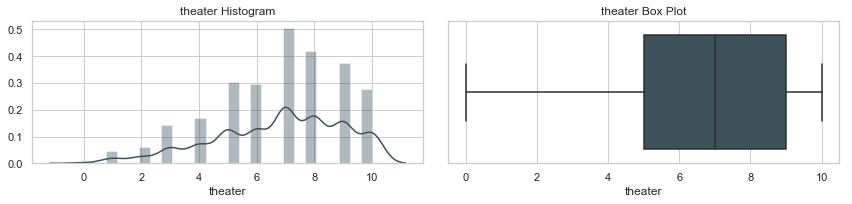

Interest in Movies


count  missing  min  25%      mean  50%  75%   max        sd  \
movies  8299.0       79  0.0  7.0  7.919629  8.0  9.0  10.0  0.096646   

             skew    kurtosis  normality_p  normality  
movies -10.151855  101.060152          0.0  Reject H0

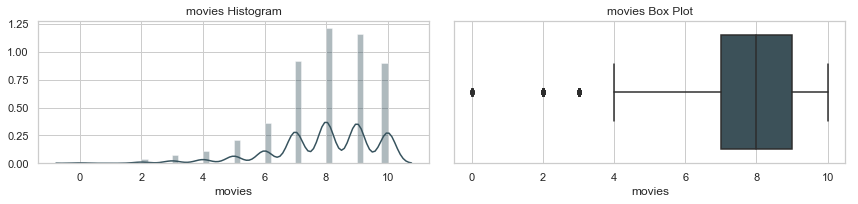

Interest in Concerts


count  missing  min  25%      mean  50%  75%   max        sd  \
concerts  8299.0       79  0.0  5.0  6.825401  7.0  8.0  10.0  0.096646   

               skew    kurtosis  normality_p  normality  
concerts -10.151855  101.060152          0.0  Reject H0

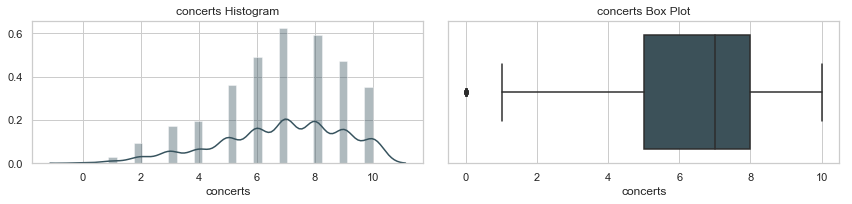

Interest in Music


count  missing  min  25%      mean  50%  75%   max        sd  \
music  8299.0       79  1.0  7.0  7.851066  8.0  9.0  10.0  0.096646   

            skew    kurtosis  normality_p  normality  
music -10.151855  101.060152          0.0  Reject H0

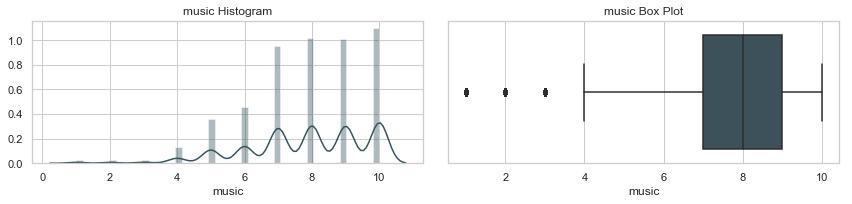

Interest in Shopping


count  missing  min  25%      mean  50%  75%   max        sd  \
shopping  8299.0       79  1.0  4.0  5.631281  6.0  8.0  10.0  0.096646   

               skew    kurtosis  normality_p  normality  
shopping -10.151855  101.060152          0.0  Reject H0

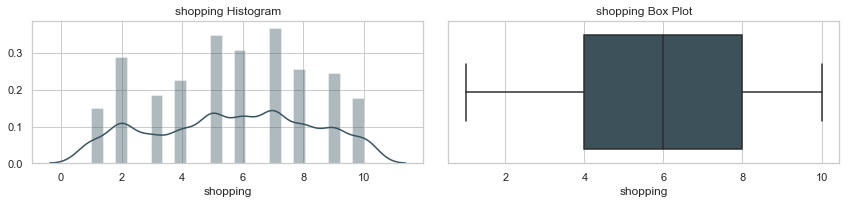

Interest in Yoga


count  missing  min  25%      mean  50%  75%   max        sd  \
yoga  8299.0       79  0.0  2.0  4.339197  4.0  7.0  10.0  0.096646   

           skew    kurtosis  normality_p  normality  
yoga -10.151855  101.060152          0.0  Reject H0

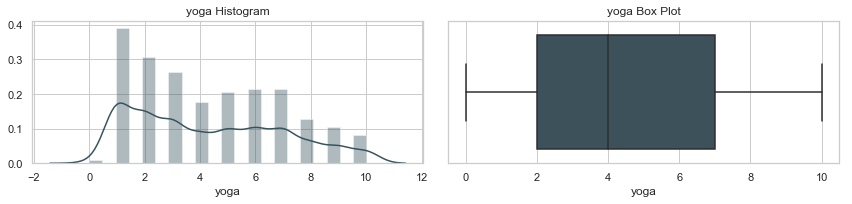

How Happy Do You Expect to Be?


count  missing  min  25%      mean  50%  75%   max        sd  \
exphappy  8277.0      101  1.0  5.0  5.534131  6.0  7.0  10.0  0.109133   

              skew   kurtosis  normality_p  normality  
exphappy -8.942186  77.962698          0.0  Reject H0

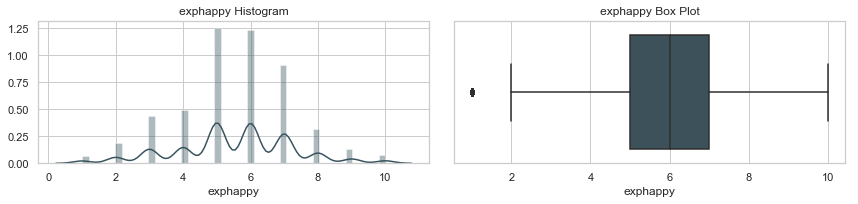

Expected Number of Yeses Out of 20


count  missing  min  25%      mean  50%  75%   max        sd  \
expnum  1800.0     6578  0.0  2.0  5.570556  4.0  8.0  20.0  0.410717   

            skew  kurtosis  normality_p  normality  
expnum  1.388555 -0.071916          0.0  Reject H0

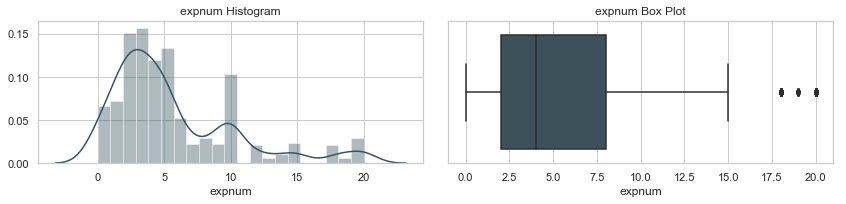

How Important is  Attraction to Subject at Signup


count  missing  min   25%       mean   50%   75%    max        sd  \
attr1_1  8299.0       79  0.0  15.0  22.514632  20.0  25.0  100.0  0.096646   

              skew    kurtosis  normality_p  normality  
attr1_1 -10.151855  101.060152          0.0  Reject H0

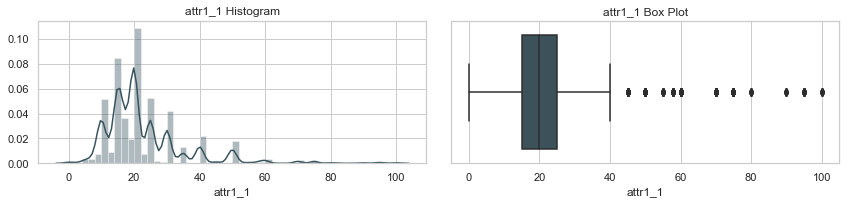

How Important is  Sincerity to Subject at Signup


count  missing  min   25%       mean    50%   75%   max        sd  \
sinc1_1  8299.0       79  0.0  15.0  17.396389  18.18  20.0  60.0  0.096646   

              skew    kurtosis  normality_p  normality  
sinc1_1 -10.151855  101.060152          0.0  Reject H0

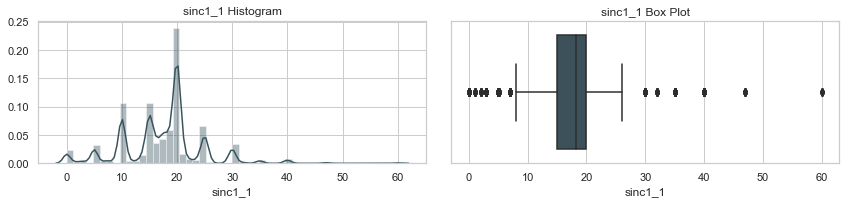

How Important is  Intelligence to Subject at Signup


count  missing  min    25%       mean   50%    75%   max        sd  \
intel1_1  8299.0       79  0.0  17.39  20.265613  20.0  23.81  50.0  0.096646   

               skew    kurtosis  normality_p  normality  
intel1_1 -10.151855  101.060152          0.0  Reject H0

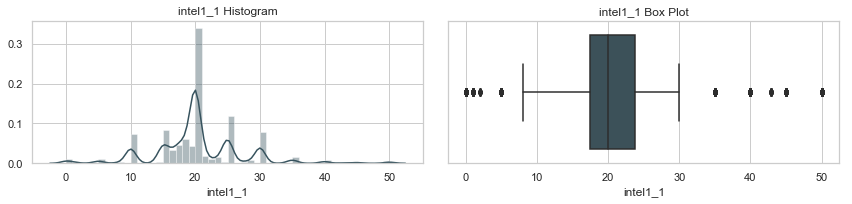

How Important is  Funny to Subject at Signup


count  missing  min   25%       mean   50%   75%   max        sd  \
fun1_1  8289.0       89  0.0  15.0  17.457043  18.0  20.0  50.0  0.102519   

            skew   kurtosis  normality_p  normality  
fun1_1 -9.547019  89.145569          0.0  Reject H0

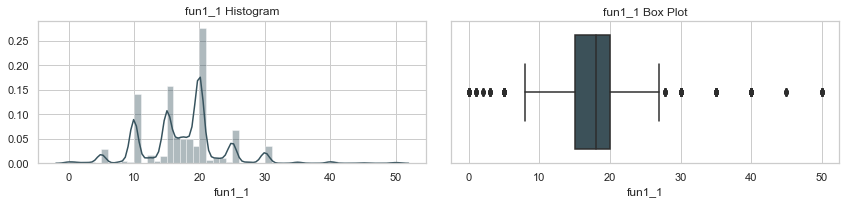

How Important is  Ambition to Subject at Signup


count  missing  min  25%       mean   50%   75%   max       sd  \
amb1_1  8279.0       99  0.0  5.0  10.682539  10.0  15.0  53.0  0.10806   

            skew   kurtosis  normality_p  normality  
amb1_1 -9.035387  79.638221          0.0  Reject H0

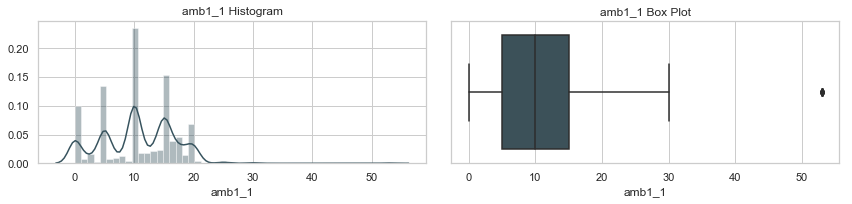

How Important is  Shared Interests to Subject at Signup


count  missing  min   25%       mean    50%   75%   max        sd  \
shar1_1  8257.0      121  0.0  9.52  11.845111  10.64  16.0  30.0  0.119306   

             skew   kurtosis  normality_p  normality  
shar1_1 -8.139676  64.254324          0.0  Reject H0

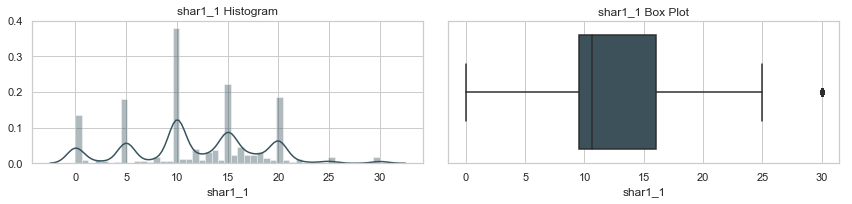

How Important is  Attraction to Most Others at Signup


count  missing  min   25%      mean   50%   75%   max        sd  \
attr4_1  6489.0     1889  5.0  10.0  26.39436  25.0  35.0  95.0  0.417892   

             skew  kurtosis  normality_p  normality  
attr4_1 -1.313872 -0.273741          0.0  Reject H0

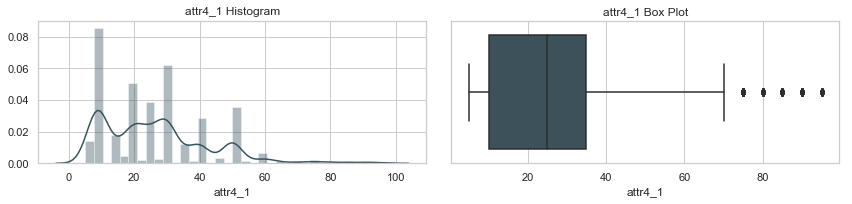

How Important is  Sincerity to Most Others at Signup


count  missing  min  25%       mean   50%   75%   max        sd  \
sinc4_1  6489.0     1889  0.0  6.0  11.071506  10.0  15.0  35.0  0.417892   

             skew  kurtosis  normality_p  normality  
sinc4_1 -1.313872 -0.273741          0.0  Reject H0

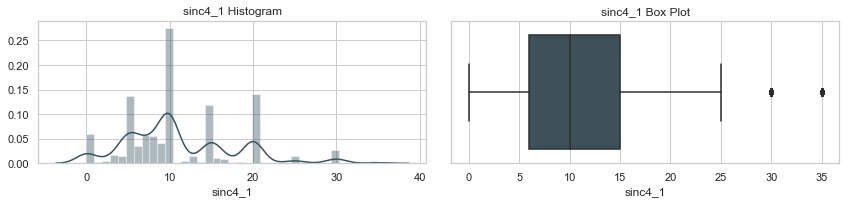

How Important is  Intelligence to Most Others at Signup


count  missing  min  25%       mean   50%   75%   max        sd  \
intel4_1  6489.0     1889  0.0  8.0  12.636308  10.0  16.0  35.0  0.417892   

              skew  kurtosis  normality_p  normality  
intel4_1 -1.313872 -0.273741          0.0  Reject H0

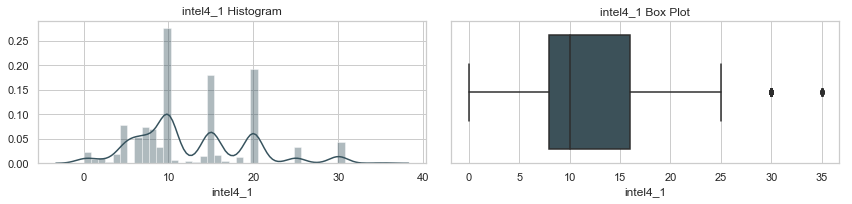

How Important is  Funny to Most Others at Signup


count  missing  min   25%       mean   50%   75%   max        sd  \
fun4_1  6489.0     1889  0.0  10.0  15.566805  15.0  20.0  45.0  0.417892   

            skew  kurtosis  normality_p  normality  
fun4_1 -1.313872 -0.273741          0.0  Reject H0

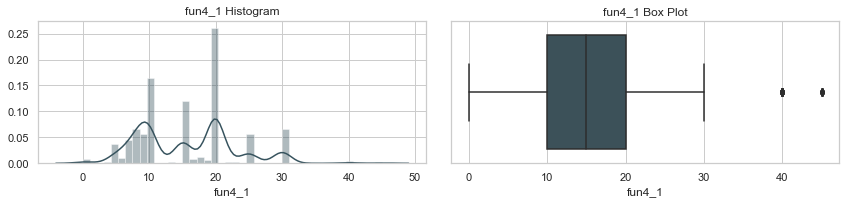

How Important is  Ambition to Most Others at Signup


count  missing  min  25%      mean   50%   75%   max        sd  \
amb4_1  6489.0     1889  0.0  5.0  9.780089  10.0  15.0  50.0  0.417892   

            skew  kurtosis  normality_p  normality  
amb4_1 -1.313872 -0.273741          0.0  Reject H0

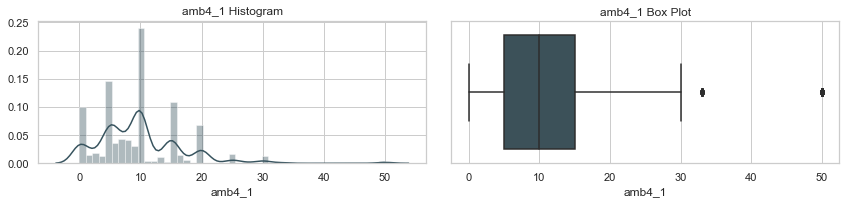

How Important is  Shared Interests to Most Others at Signup


count  missing  min  25%       mean   50%   75%   max        sd  \
shar4_1  6467.0     1911  0.0  7.0  11.014845  10.0  15.0  40.0  0.419606   

             skew  kurtosis  normality_p  normality  
shar4_1 -1.295991 -0.320408          0.0  Reject H0

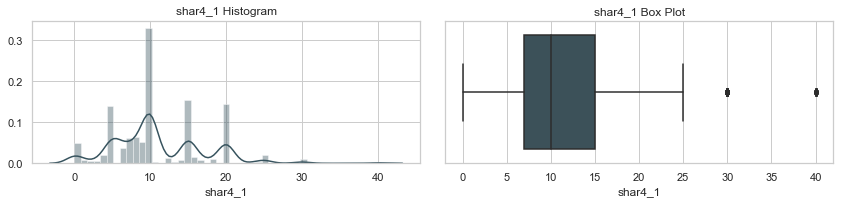

How Important is  Attraction to Opposite Sex  at Signup


count  missing  min   25%       mean   50%   75%    max        sd  \
attr2_1  8299.0       79  0.0  20.0  30.362192  25.0  40.0  100.0  0.096646   

              skew    kurtosis  normality_p  normality  
attr2_1 -10.151855  101.060152          0.0  Reject H0

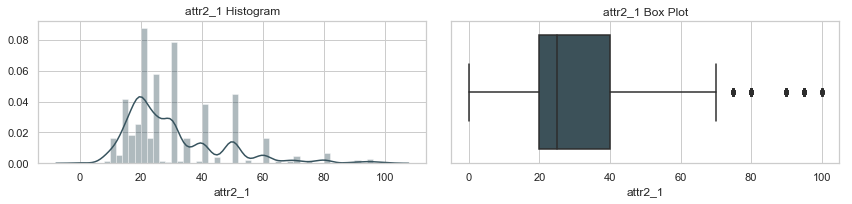

How Important is  Sincerity to Opposite Sex  at Signup


count  missing  min   25%       mean   50%    75%   max        sd  \
sinc2_1  8299.0       79  0.0  10.0  13.273691  15.0  18.75  50.0  0.096646   

              skew    kurtosis  normality_p  normality  
sinc2_1 -10.151855  101.060152          0.0  Reject H0

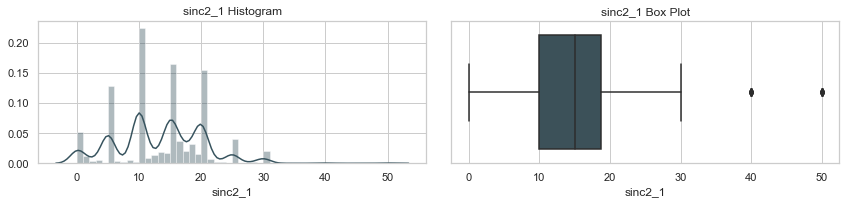

How Important is  Intelligence to Opposite Sex  at Signup


count  missing  min   25%       mean   50%   75%   max        sd  \
intel2_1  8299.0       79  0.0  10.0  14.416891  15.0  20.0  40.0  0.096646   

               skew    kurtosis  normality_p  normality  
intel2_1 -10.151855  101.060152          0.0  Reject H0

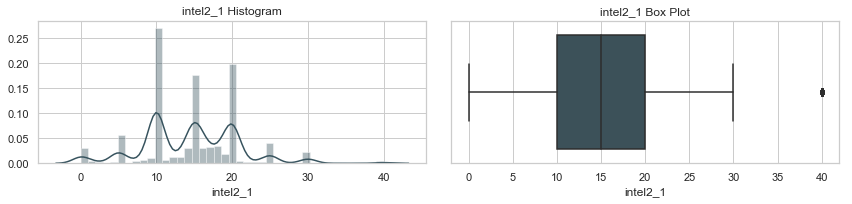

How Important is  Funny to Opposite Sex  at Signup


count  missing  min   25%      mean   50%   75%   max        sd  \
fun2_1  8299.0       79  0.0  15.0  18.42262  20.0  20.0  50.0  0.096646   

             skew    kurtosis  normality_p  normality  
fun2_1 -10.151855  101.060152          0.0  Reject H0

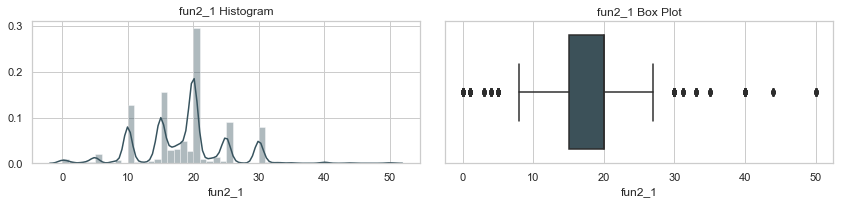

How Important is  Ambition to Opposite Sex  at Signup


count  missing  min  25%       mean   50%   75%   max        sd  \
amb2_1  8289.0       89  0.0  6.0  11.744499  10.0  15.0  50.0  0.102519   

            skew   kurtosis  normality_p  normality  
amb2_1 -9.547019  89.145569          0.0  Reject H0

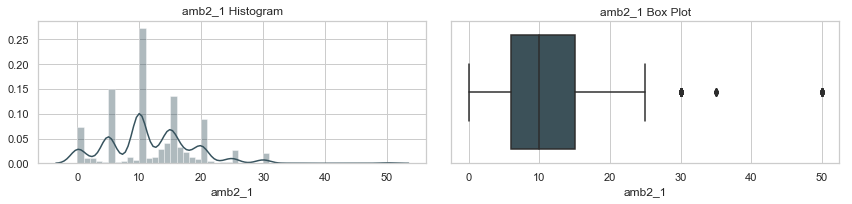

How Important is  Shared Interests to Opposite Sex  at Signup


count  missing  min   25%       mean   50%    75%   max        sd  \
shar2_1  8289.0       89  0.0  10.0  11.854817  10.0  15.63  30.0  0.102519   

             skew   kurtosis  normality_p  normality  
shar2_1 -9.547019  89.145569          0.0  Reject H0

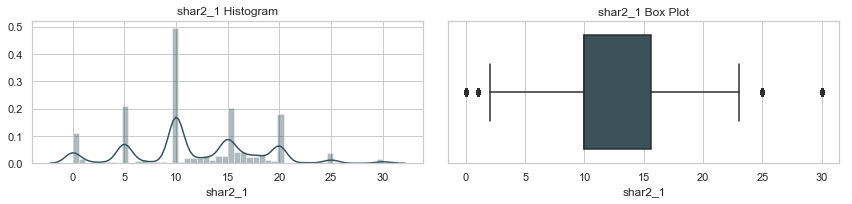

How Does Subject Measure Up on Attraction  at Signup


count  missing  min  25%      mean  50%  75%   max        sd  \
attr3_1  8273.0      105  2.0  6.0  7.084733  7.0  8.0  10.0  0.111246   

             skew   kurtosis  normality_p  normality  
attr3_1 -8.763742  74.803168          0.0  Reject H0

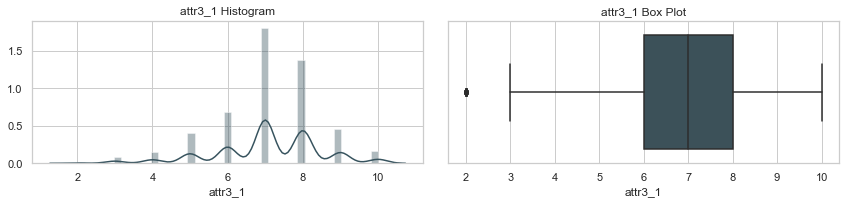

How Does Subject Measure Up on Sincerity  at Signup


count  missing  min  25%      mean  50%  75%   max        sd  \
sinc3_1  8273.0      105  2.0  8.0  8.294935  8.0  9.0  10.0  0.111246   

             skew   kurtosis  normality_p  normality  
sinc3_1 -8.763742  74.803168          0.0  Reject H0

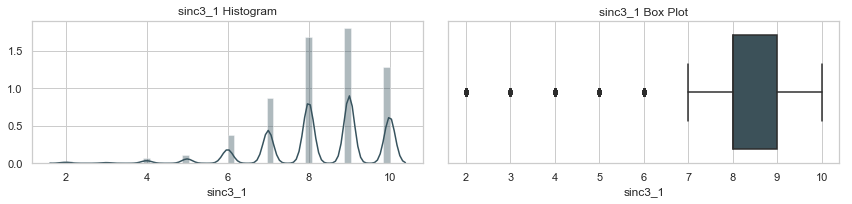

How Does Subject Measure Up on Intelligence  at Signup


count  missing  min  25%     mean  50%  75%   max        sd  \
fun3_1  8273.0      105  2.0  7.0  7.70446  8.0  9.0  10.0  0.111246   

            skew   kurtosis  normality_p  normality  
fun3_1 -8.763742  74.803168          0.0  Reject H0

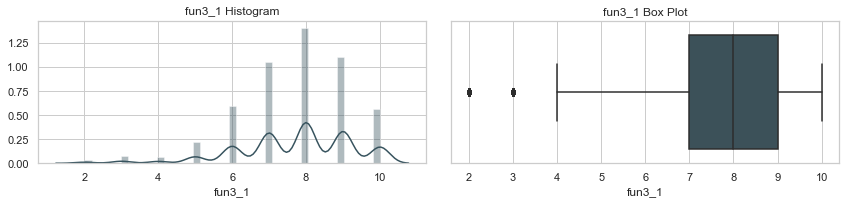

How Does Subject Measure Up on Funny  at Signup


count  missing  min  25%      mean  50%  75%   max        sd  \
intel3_1  8273.0      105  3.0  8.0  8.403965  8.0  9.0  10.0  0.111246   

              skew   kurtosis  normality_p  normality  
intel3_1 -8.763742  74.803168          0.0  Reject H0

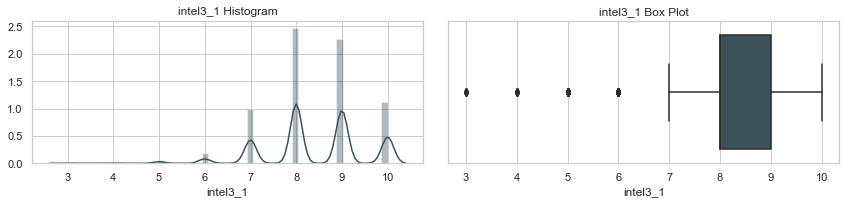

How Does Subject Measure Up on Ambition  at Signup


count  missing  min  25%      mean  50%  75%   max        sd  \
amb3_1  8273.0      105  2.0  7.0  7.578388  8.0  9.0  10.0  0.111246   

            skew   kurtosis  normality_p  normality  
amb3_1 -8.763742  74.803168          0.0  Reject H0

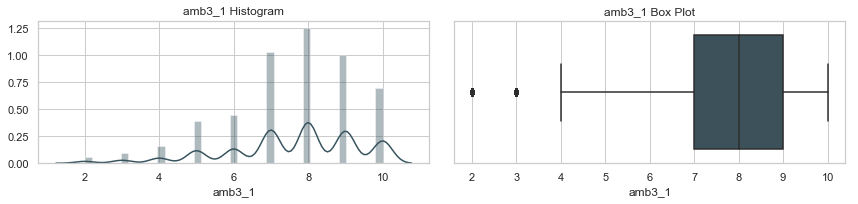

Subject's Opinion on How he/she is Perceived w.r.t.  Attraction


count  missing  min  25%      mean  50%  75%   max        sd  \
attr5_1  4906.0     3472  2.0  6.0  6.941908  7.0  8.0  10.0  0.492621   

             skew  kurtosis  normality_p  normality  
attr5_1 -0.347453 -1.879277          0.0  Reject H0

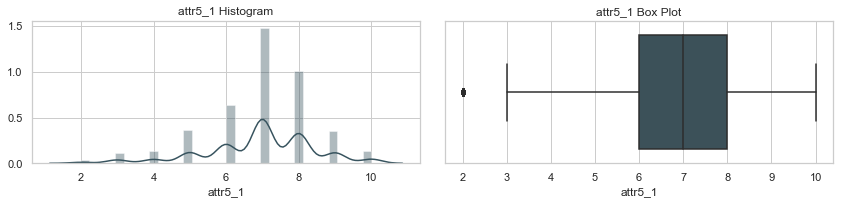

Subject's Opinion on How he/she is Perceived w.r.t.  Sincerity


count  missing  min  25%      mean  50%  75%   max        sd  \
sinc5_1  4906.0     3472  1.0  7.0  7.927232  8.0  9.0  10.0  0.492621   

             skew  kurtosis  normality_p  normality  
sinc5_1 -0.347453 -1.879277          0.0  Reject H0

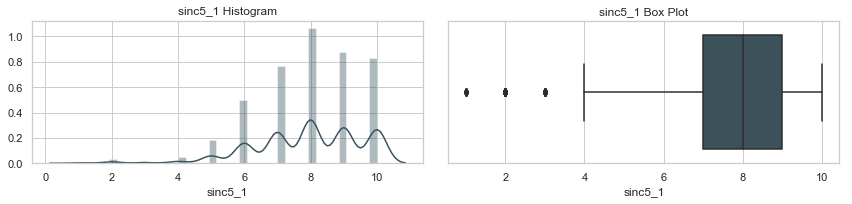

Subject's Opinion on How he/she is Perceived w.r.t.  Intelligence


count  missing  min  25%      mean  50%  75%   max        sd  \
intel5_1  4906.0     3472  3.0  8.0  8.284346  8.0  9.0  10.0  0.492621   

              skew  kurtosis  normality_p  normality  
intel5_1 -0.347453 -1.879277          0.0  Reject H0

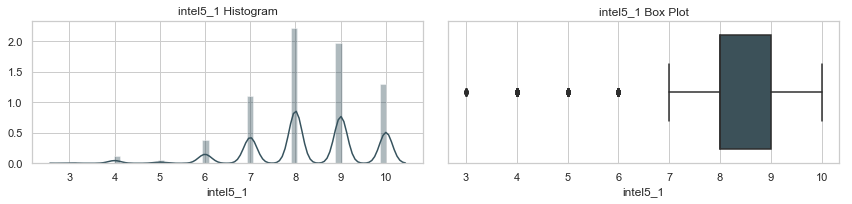

Subject's Opinion on How he/she is Perceived w.r.t.  Funny


count  missing  min  25%      mean  50%  75%   max        sd  \
fun5_1  4906.0     3472  2.0  6.0  7.426213  8.0  9.0  10.0  0.492621   

            skew  kurtosis  normality_p  normality  
fun5_1 -0.347453 -1.879277          0.0  Reject H0

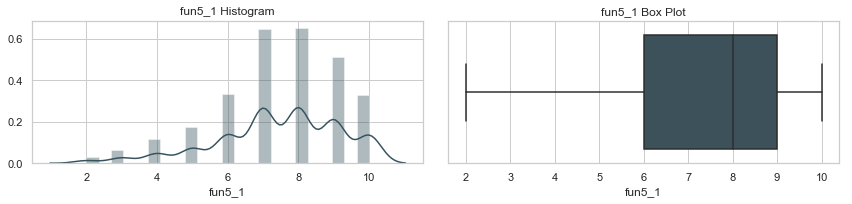

Subject's Opinion on How he/she is Perceived w.r.t.  Ambition


count  missing  min  25%      mean  50%  75%   max        sd  \
amb5_1  4906.0     3472  1.0  7.0  7.617611  8.0  9.0  10.0  0.492621   

            skew  kurtosis  normality_p  normality  
amb5_1 -0.347453 -1.879277          0.0  Reject H0

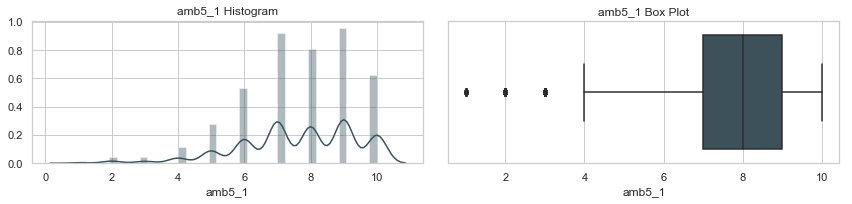

Decision by Subject


No   Yes  missing
dec  4860  3518        0

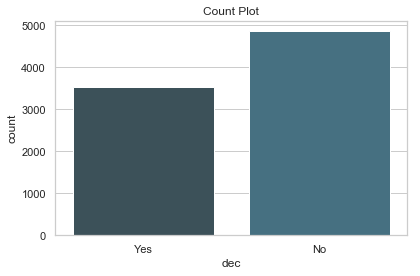

Subject Rating of Partner Attraction  at Night of Event


count  missing  min  25%      mean  50%  75%   max        sd      skew  \
attr  8176.0      202  0.0  5.0  6.189995  6.0  8.0  10.0  0.153393 -6.204833   

       kurtosis  normality_p  normality  
attr  36.499954          0.0  Reject H0

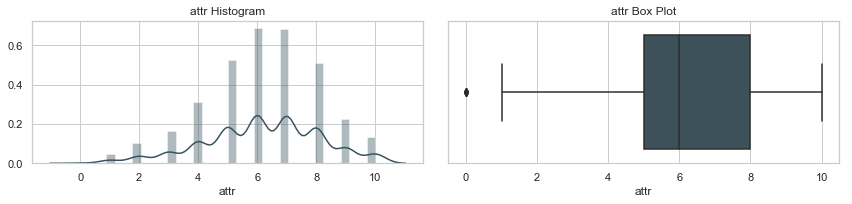

Subject Rating of Partner Sincerity  at Night of Event


count  missing  min  25%      mean  50%  75%   max        sd      skew  \
sinc  8101.0      277  0.0  6.0  7.175164  7.0  8.0  10.0  0.178801 -5.222995   

       kurtosis  normality_p  normality  
sinc  25.279681          0.0  Reject H0

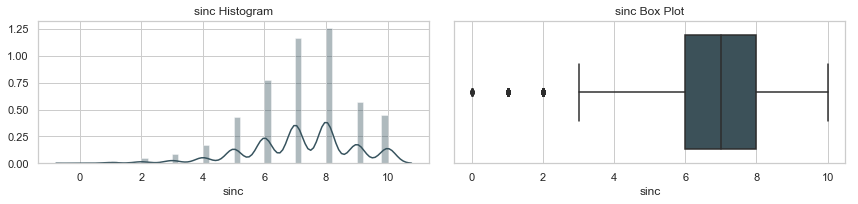

Subject Rating of Partner Intelligence  at Night of Event


count  missing  min  25%      mean  50%  75%   max        sd  \
intel  8082.0      296  0.0  6.0  7.368597  7.0  8.0  10.0  0.184614   

           skew   kurtosis  normality_p  normality  
intel -5.033953  23.340679          0.0  Reject H0

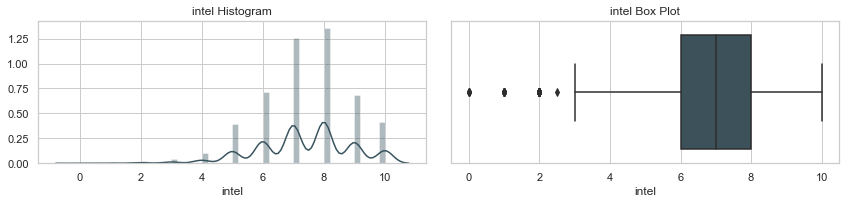

Subject Rating of Partner Funny  at Night of Event


count  missing  min  25%      mean  50%  75%   max        sd      skew  \
fun  8028.0      350  0.0  5.0  6.400598  7.0  8.0  10.0  0.200077 -4.580474   

     kurtosis  normality_p  normality  
fun  18.98074          0.0  Reject H0

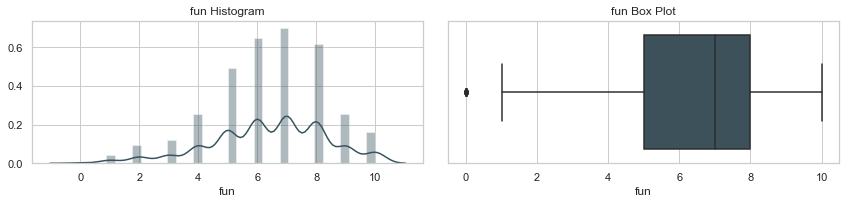

Subject Rating of Partner Ambition  at Night of Event


count  missing  min  25%      mean  50%  75%   max        sd     skew  \
amb  7666.0      712  0.0  6.0  6.777524  7.0  8.0  10.0  0.278859 -2.97653   

     kurtosis  normality_p  normality  
amb  6.859732          0.0  Reject H0

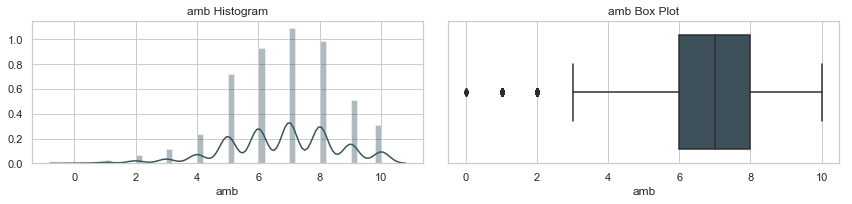

Subject Rating of Partner Shared Interests  at Night of Event


count  missing  min  25%      mean  50%  75%   max        sd      skew  \
shar  7311.0     1067  0.0  4.0  5.474559  6.0  7.0  10.0  0.333373 -2.235591   

      kurtosis  normality_p  normality  
shar  2.997866          0.0  Reject H0

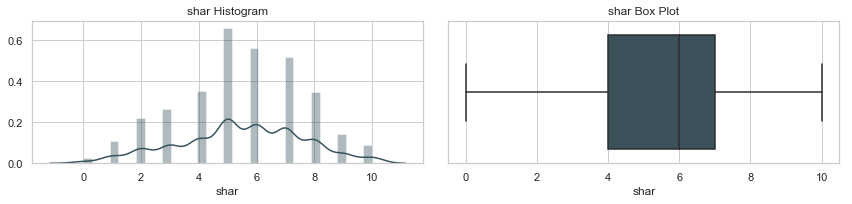

Subject Like for Partner at Night of Event


count  missing  min  25%      mean  50%  75%   max        sd      skew  \
like  8138.0      240  0.0  5.0  6.134087  6.0  7.0  10.0  0.166811 -5.651356   

       kurtosis  normality_p  normality  
like  29.937825          0.0  Reject H0

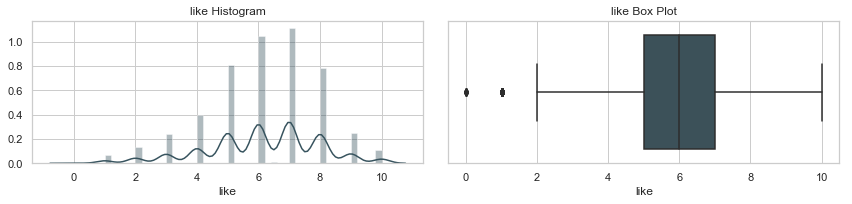

Probability Partner says Yes


count  missing  min  25%      mean  50%  75%   max        sd      skew  \
prob  8069.0      309  0.0  4.0  5.207523  5.0  7.0  10.0  0.188473 -4.914424   

       kurtosis  normality_p  normality  
prob  22.151563          0.0  Reject H0

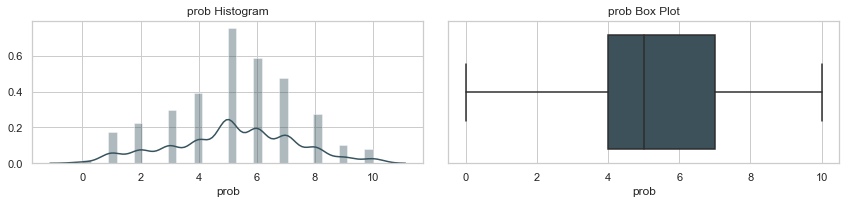

Subject Met Partner


count  missing  min  25%      mean  50%  75%  max        sd      skew  \
met  8003.0      375  0.0  0.0  0.948769  0.0  2.0  8.0  0.206777 -4.403202   

      kurtosis  normality_p  normality  
met  17.388191          0.0  Reject H0

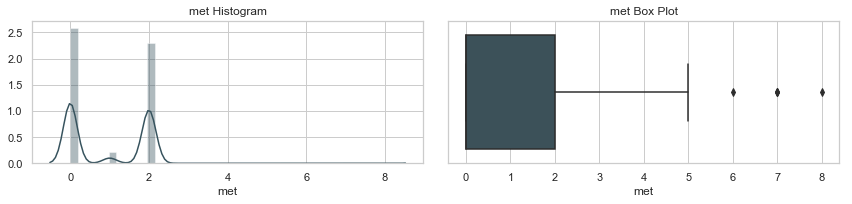

Number of Estimated Matches Subject Will Get


count  missing  min  25%      mean  50%  75%   max        sd  \
match_es  7205.0     1173  0.0  2.0  3.207814  3.0  4.0  18.0  0.346997   

              skew  kurtosis  normality_p  normality  
match_es -2.074891  2.305174          0.0  Reject H0

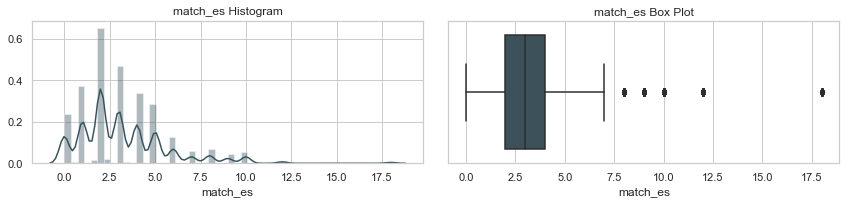

How Important is  Attraction to Subject Halfway Through Night


count  missing  min    25%       mean    50%   75%   max        sd  \
attr1_s  4096.0     4282  3.0  14.81  20.791624  17.65  25.0  95.0  0.499877   

             skew  kurtosis  normality_p  normality  
attr1_s  0.044413 -1.998027          0.0  Reject H0

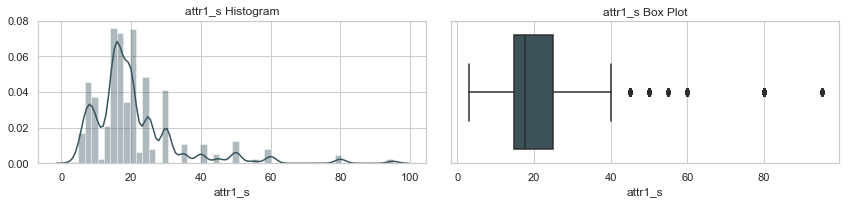

How Important is  Sincerity to Subject Halfway Through Night


count  missing  min   25%       mean    50%   75%   max        sd  \
sinc1_s  4096.0     4282  0.0  10.0  15.434255  15.79  20.0  50.0  0.499877   

             skew  kurtosis  normality_p  normality  
sinc1_s  0.044413 -1.998027          0.0  Reject H0

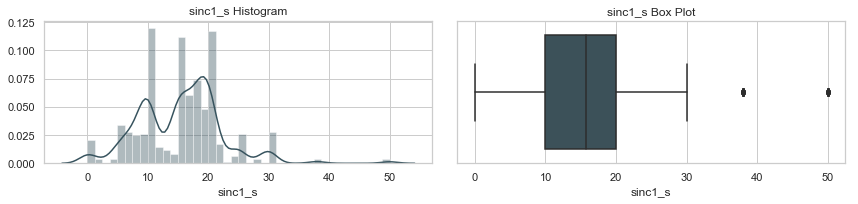

How Important is  Intelligence to Subject Halfway Through Night


count  missing  min   25%       mean    50%   75%   max        sd  \
intel1_s  4096.0     4282  0.0  10.0  17.243708  18.42  20.0  40.0  0.499877   

              skew  kurtosis  normality_p  normality  
intel1_s  0.044413 -1.998027          0.0  Reject H0

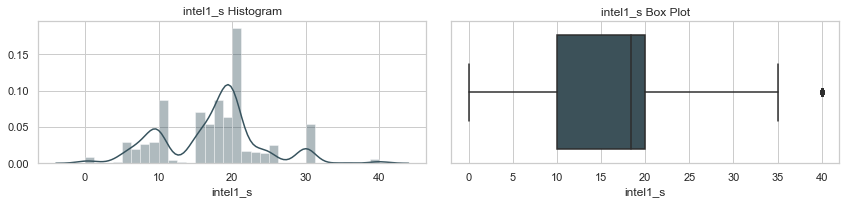

How Important is  Funny to Subject Halfway Through Night


count  missing  min   25%       mean    50%   75%   max        sd  \
fun1_s  4096.0     4282  1.0  10.0  15.260869  15.91  20.0  40.0  0.499877   

            skew  kurtosis  normality_p  normality  
fun1_s  0.044413 -1.998027          0.0  Reject H0

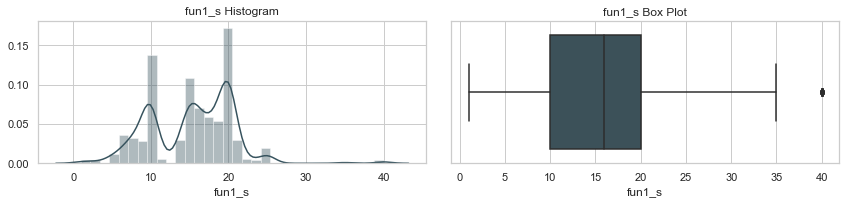

How Important is  Ambition to Subject Halfway Through Night


count  missing  min  25%       mean   50%   75%    max        sd  \
amb1_s  4096.0     4282  0.0  7.0  11.144619  10.0  15.0  23.81  0.499877   

            skew  kurtosis  normality_p  normality  
amb1_s  0.044413 -1.998027          0.0  Reject H0

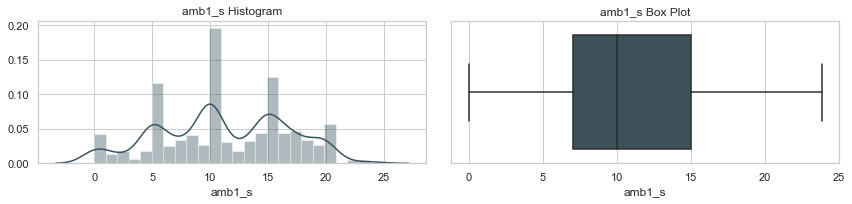

How Important is  Shared Interests to Subject Halfway Through Night


count  missing  min  25%       mean   50%    75%   max        sd  \
shar1_s  4096.0     4282  0.0  9.0  12.457925  12.5  16.28  30.0  0.499877   

             skew  kurtosis  normality_p  normality  
shar1_s  0.044413 -1.998027          0.0  Reject H0

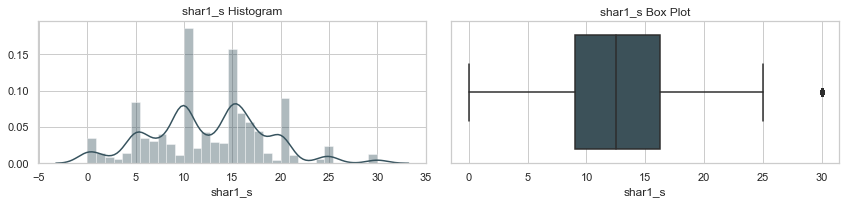

Subject Self Rating on Attraction  Halfway Through Night


count  missing  min  25%     mean  50%  75%   max        sd  \
attr3_s  4000.0     4378  3.0  7.0  7.21125  7.0  8.0  10.0  0.499491   

             skew  kurtosis  normality_p  normality  
attr3_s  0.090328 -1.991841          0.0  Reject H0

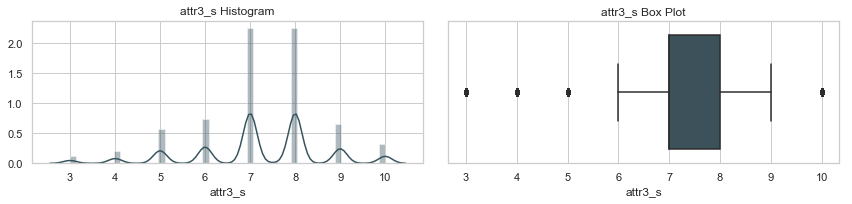

Subject Self Rating on Sincerity  Halfway Through Night


count  missing  min  25%   mean  50%  75%   max        sd      skew  \
sinc3_s  4000.0     4378  1.0  7.0  8.082  8.0  9.0  10.0  0.499491  0.090328   

         kurtosis  normality_p  normality  
sinc3_s -1.991841          0.0  Reject H0

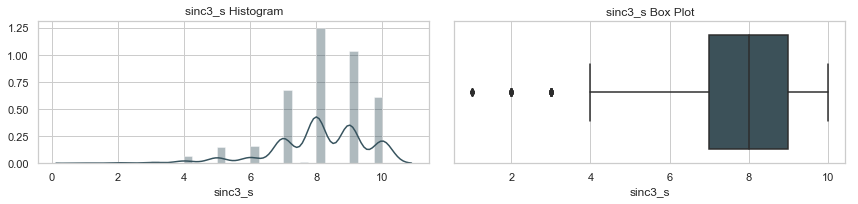

Subject Self Rating on Intelligence  Halfway Through Night


count  missing  min  25%     mean  50%  75%   max        sd  \
intel3_s  4000.0     4378  4.0  8.0  8.25775  8.0  9.0  10.0  0.499491   

              skew  kurtosis  normality_p  normality  
intel3_s  0.090328 -1.991841          0.0  Reject H0

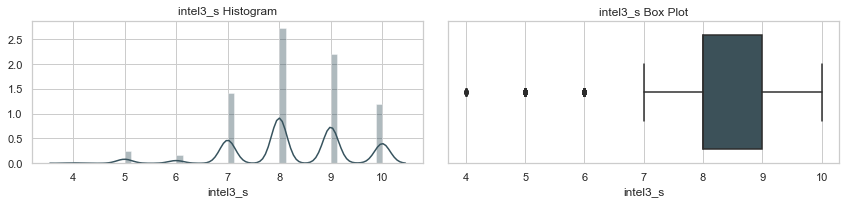

Subject Self Rating on Funny  Halfway Through Night


count  missing  min  25%    mean  50%  75%   max        sd      skew  \
fun3_s  4000.0     4378  3.0  7.0  7.6925  8.0  9.0  10.0  0.499491  0.090328   

        kurtosis  normality_p  normality  
fun3_s -1.991841          0.0  Reject H0

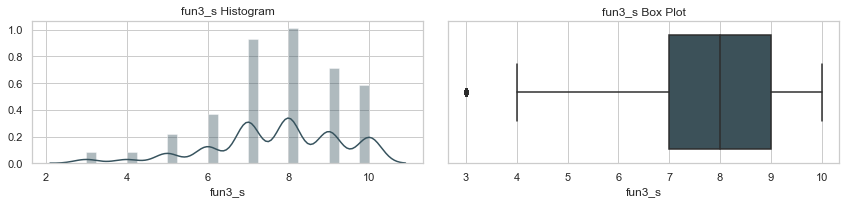

Subject Self Rating on Ambition  Halfway Through Night


count  missing  min  25%     mean  50%  75%   max        sd  \
amb3_s  4000.0     4378  2.0  7.0  7.58925  8.0  9.0  10.0  0.499491   

            skew  kurtosis  normality_p  normality  
amb3_s  0.090328 -1.991841          0.0  Reject H0

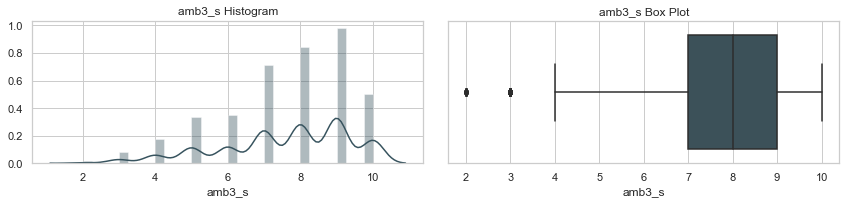

Subject Happiness with People Met   Day After Event


count  missing  min  25%     mean  50%  75%   max        sd  \
satis_2  7463.0      915  1.0  5.0  5.71151  6.0  7.0  10.0  0.311908   

             skew  kurtosis  normality_p  normality  
satis_2 -2.505771  4.278889          0.0  Reject H0

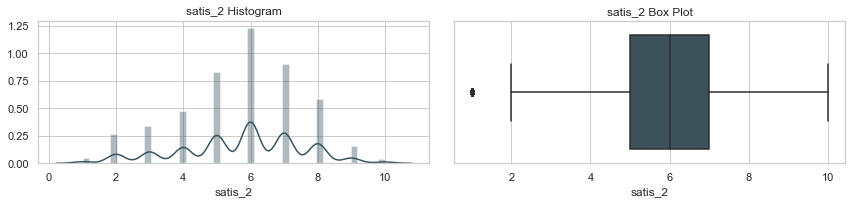

Opinion on Length of Speed Dates


count  missing  min  25%      mean  50%  75%  max        sd  \
length  7463.0      915  1.0  1.0  1.843495  1.0  3.0  3.0  0.311908   

            skew  kurtosis  normality_p  normality  
length -2.505771  4.278889          0.0  Reject H0

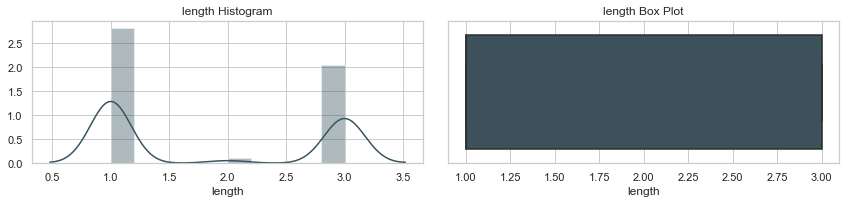

Opinion on Number of Speed Dates


count  missing  min  25%      mean  50%  75%  max        sd  \
numdat_2  7433.0      945  1.0  2.0  2.338087  2.0  3.0  3.0  0.316343   

              skew  kurtosis  normality_p  normality  
numdat_2 -2.448008  3.992744          0.0  Reject H0

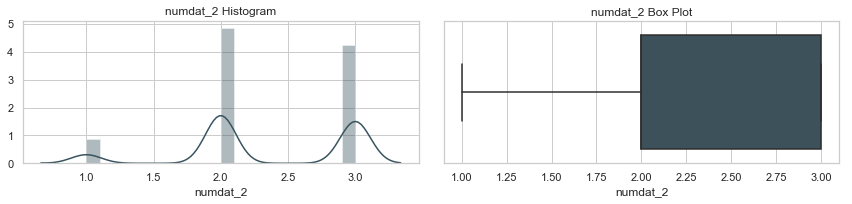

How Important Was Attraction in Your Decision - Day After Event


count  missing   min   25%       mean   50%   75%   max        sd  \
attr7_2  1984.0     6394  10.0  20.0  32.819556  30.0  40.0  80.0  0.425125   

             skew  kurtosis  normality_p  normality  
attr7_2  1.238173 -0.466927          0.0  Reject H0

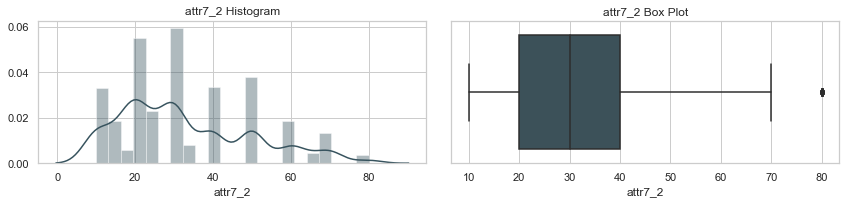

How Important Was Sincerity in Your Decision - Day After Event


count  missing  min   25%       mean   50%   75%   max        sd  \
sinc7_2  1955.0     6423  0.0  10.0  13.529923  10.0  20.0  40.0  0.422963   

             skew  kurtosis  normality_p  normality  
sinc7_2  1.260871 -0.410203          0.0  Reject H0

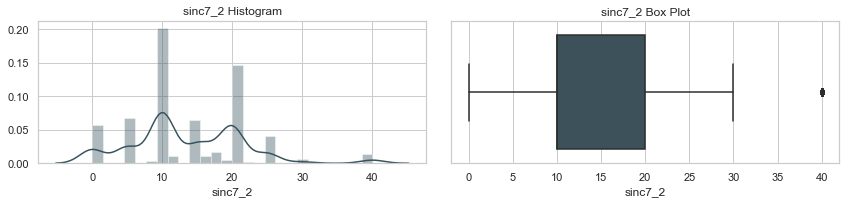

How Important Was Intelligence in Your Decision - Day After Event


count  missing  min   25%       mean   50%   75%   max        sd  \
intel7_2  1984.0     6394  0.0  10.0  15.293851  15.0  20.0  50.0  0.425125   

              skew  kurtosis  normality_p  normality  
intel7_2  1.238173 -0.466927          0.0  Reject H0

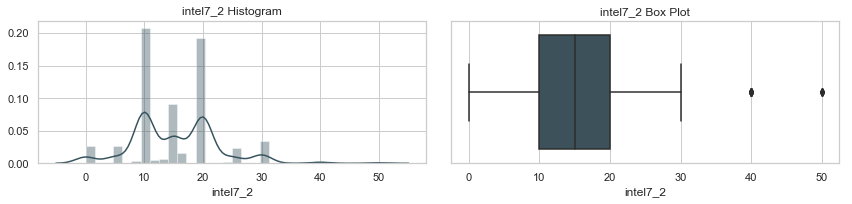

How Important Was Funny in Your Decision - Day After Event


count  missing  min   25%       mean   50%   75%   max        sd  \
fun7_2  1984.0     6394  0.0  10.0  18.868448  20.0  24.0  50.0  0.425125   

            skew  kurtosis  normality_p  normality  
fun7_2  1.238173 -0.466927          0.0  Reject H0

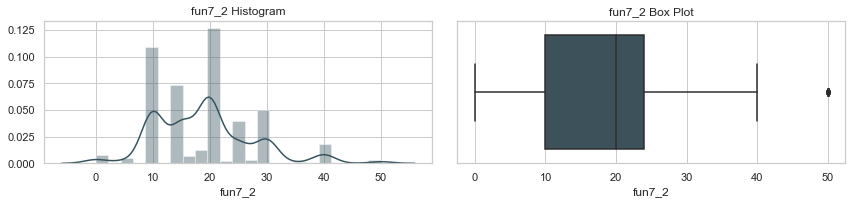

How Important Was Ambition in Your Decision - Day After Event


count  missing  min  25%      mean  50%   75%   max        sd  \
amb7_2  1955.0     6423  0.0  0.0  7.286957  5.0  10.0  20.0  0.422963   

            skew  kurtosis  normality_p  normality  
amb7_2  1.260871 -0.410203          0.0  Reject H0

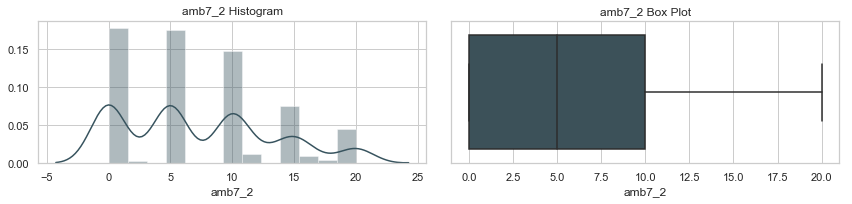

How Important Was Shared Interests in Your Decision - Day After Event


count  missing  min  25%       mean   50%   75%   max        sd  \
shar7_2  1974.0     6404  0.0  5.0  12.156028  10.0  20.0  40.0  0.424384   

             skew  kurtosis  normality_p  normality  
shar7_2  1.245961 -0.447581          0.0  Reject H0

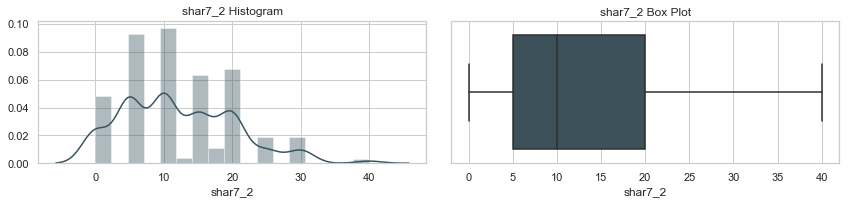

How Important is  Attraction to Subject - Day After Event


count  missing  min    25%       mean   50%   75%   max        sd  \
attr1_2  7445.0      933  5.0  16.67  26.217194  20.0  30.0  85.0  0.314581   

             skew  kurtosis  normality_p  normality  
attr1_2 -2.470821  4.104955          0.0  Reject H0

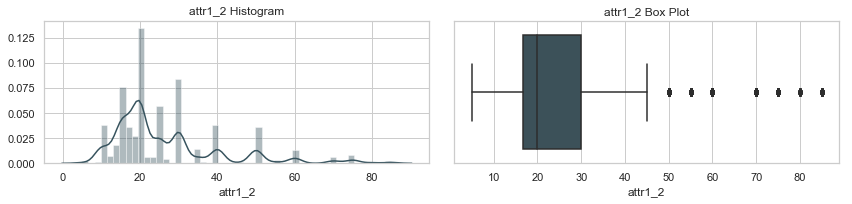

How Important is  Sincerity to Subject - Day After Event


count  missing  min   25%       mean    50%   75%   max        sd  \
sinc1_2  7463.0      915  0.0  10.0  15.865084  16.67  20.0  50.0  0.311908   

             skew  kurtosis  normality_p  normality  
sinc1_2 -2.505771  4.278889          0.0  Reject H0

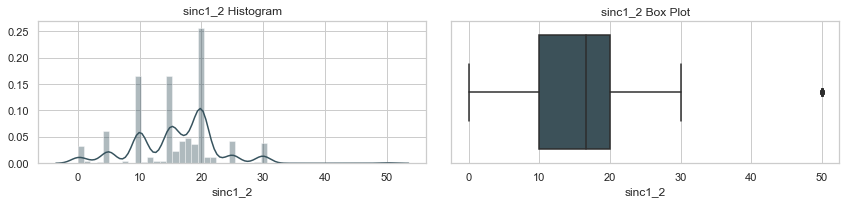

How Important is  Intelligence to Subject - Day After Event


count  missing  min   25%       mean    50%   75%   max        sd  \
intel1_2  7463.0      915  0.0  15.0  17.813755  19.05  20.0  40.0  0.311908   

              skew  kurtosis  normality_p  normality  
intel1_2 -2.505771  4.278889          0.0  Reject H0

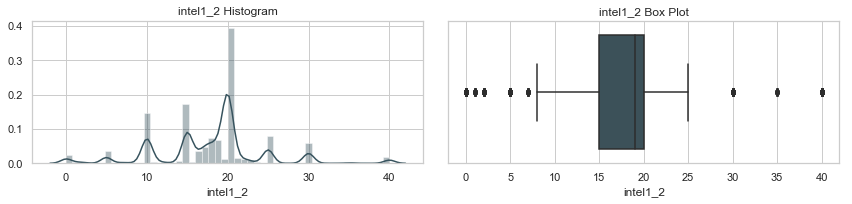

How Important is  Funny to Subject - Day After Event


count  missing  min   25%       mean    50%   75%   max        sd  \
fun1_2  7463.0      915  0.0  15.0  17.654765  18.37  20.0  50.0  0.311908   

            skew  kurtosis  normality_p  normality  
fun1_2 -2.505771  4.278889          0.0  Reject H0

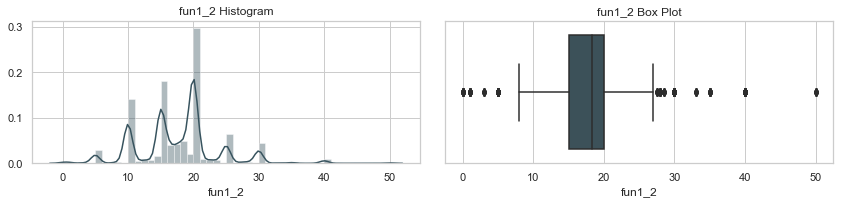

How Important is  Ambition to Subject - Day After Event


count  missing  min  25%      mean   50%   75%    max        sd  \
amb1_2  7463.0      915  0.0  5.0  9.913436  10.0  15.0  22.22  0.311908   

            skew  kurtosis  normality_p  normality  
amb1_2 -2.505771  4.278889          0.0  Reject H0

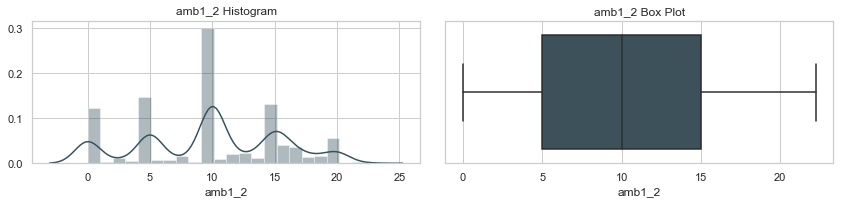

How Important is  Shared Interests to Subject - Day After Event


count  missing  min   25%       mean   50%    75%   max        sd  \
shar1_2  7463.0      915  0.0  10.0  12.760263  13.0  16.67  35.0  0.311908   

             skew  kurtosis  normality_p  normality  
shar1_2 -2.505771  4.278889          0.0  Reject H0

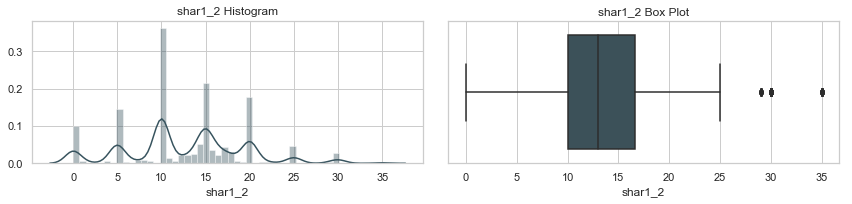

How Important is  Attraction to Most People - Day After Event


count  missing  min   25%       mean   50%   75%    max        sd  \
attr4_2  5775.0     2603  6.0  10.0  26.806234  25.0  40.0  100.0  0.462778   

             skew  kurtosis  normality_p  normality  
attr4_2 -0.818126  -1.33067          0.0  Reject H0

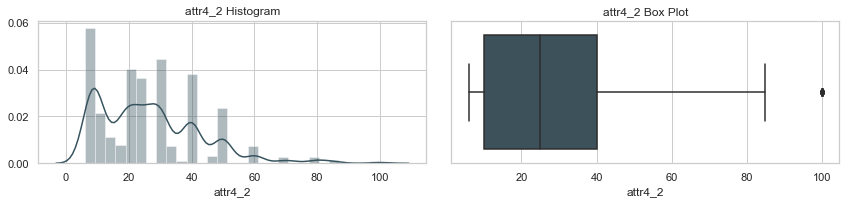

How Important is  Sincerity to Most People - Day After Event


count  missing  min  25%       mean   50%   75%   max        sd  \
sinc4_2  5775.0     2603  0.0  8.0  11.929177  10.0  15.0  35.0  0.462778   

             skew  kurtosis  normality_p  normality  
sinc4_2 -0.818126  -1.33067          0.0  Reject H0

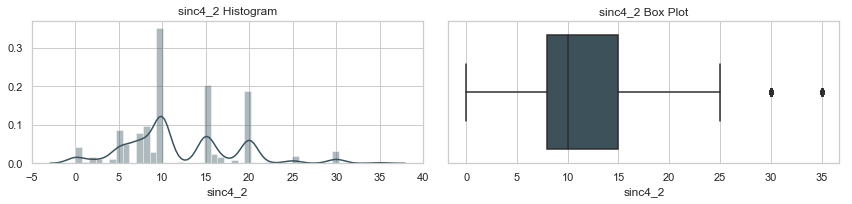

How Important is  Intelligence to Most People - Day After Event


count  missing  min  25%      mean   50%   75%   max        sd  \
intel4_2  5775.0     2603  0.0  8.0  12.10303  10.0  15.0  40.0  0.462778   

              skew  kurtosis  normality_p  normality  
intel4_2 -0.818126  -1.33067          0.0  Reject H0

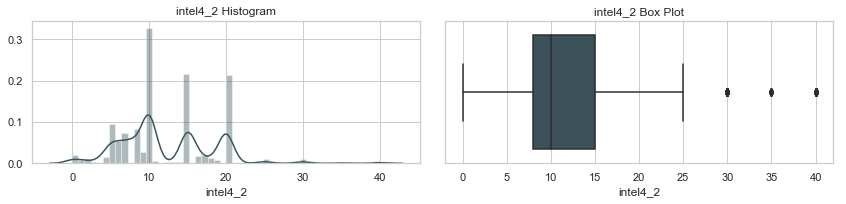

How Important is  Funny to Most People - Day After Event


count  missing  min  25%      mean   50%   75%   max        sd  \
fun4_2  5775.0     2603  0.0  9.0  15.16381  15.0  20.0  50.0  0.462778   

            skew  kurtosis  normality_p  normality  
fun4_2 -0.818126  -1.33067          0.0  Reject H0

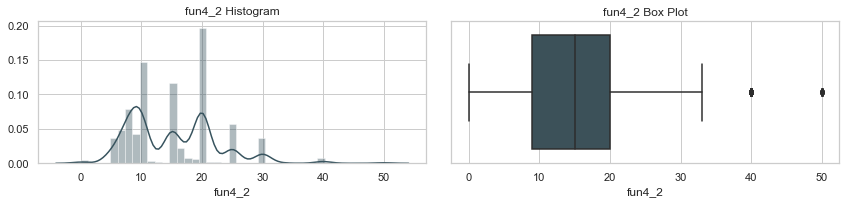

How Important is  Ambition to Most People - Day After Event


count  missing  min  25%      mean   50%   75%   max        sd  \
amb4_2  5775.0     2603  0.0  5.0  9.342511  10.0  10.0  35.0  0.462778   

            skew  kurtosis  normality_p  normality  
amb4_2 -0.818126  -1.33067          0.0  Reject H0

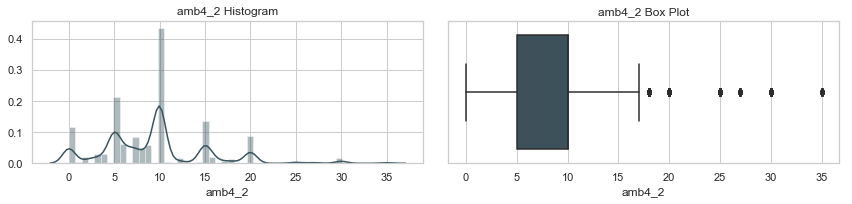

How Important is  Shared Interests to Most People - Day After Event


count  missing  min  25%       mean   50%   75%   max        sd  \
shar4_2  5775.0     2603  0.0  7.0  11.320866  10.0  15.0  40.0  0.462778   

             skew  kurtosis  normality_p  normality  
shar4_2 -0.818126  -1.33067          0.0  Reject H0

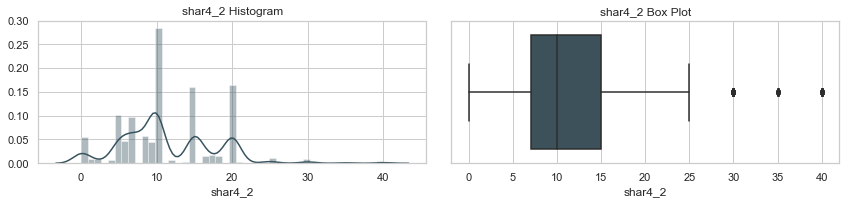

How Important is Attraction to Opposite Sex  - Day After Event


count  missing  min    25%       mean   50%    75%   max        sd  \
attr2_2  5775.0     2603  0.0  19.15  29.344369  25.0  38.46  85.0  0.462778   

             skew  kurtosis  normality_p  normality  
attr2_2 -0.818126  -1.33067          0.0  Reject H0

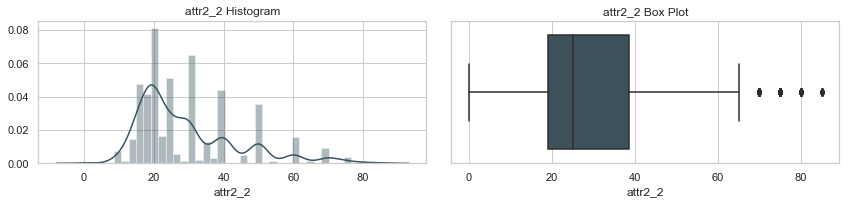

How Important is Sincerity to Opposite Sex  - Day After Event


count  missing  min   25%      mean   50%    75%   max        sd  \
sinc2_2  5775.0     2603  0.0  10.0  13.89823  15.0  19.23  40.0  0.462778   

             skew  kurtosis  normality_p  normality  
sinc2_2 -0.818126  -1.33067          0.0  Reject H0

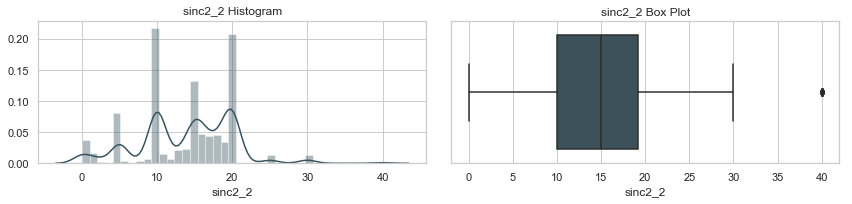

How Important is Intelligence to Opposite Sex  - Day After Event


count  missing  min   25%       mean   50%    75%    max        sd  \
intel2_2  5775.0     2603  0.0  10.0  13.958265  15.0  17.39  30.77  0.462778   

              skew  kurtosis  normality_p  normality  
intel2_2 -0.818126  -1.33067          0.0  Reject H0

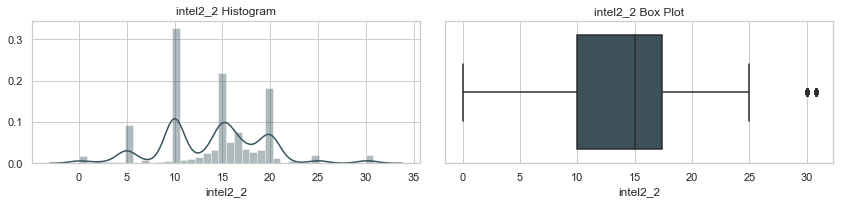

How Important is Funny to Opposite Sex  - Day After Event


count  missing  min   25%       mean    50%   75%   max        sd  \
fun2_2  5775.0     2603  0.0  15.0  17.967233  18.52  20.0  40.0  0.462778   

            skew  kurtosis  normality_p  normality  
fun2_2 -0.818126  -1.33067          0.0  Reject H0

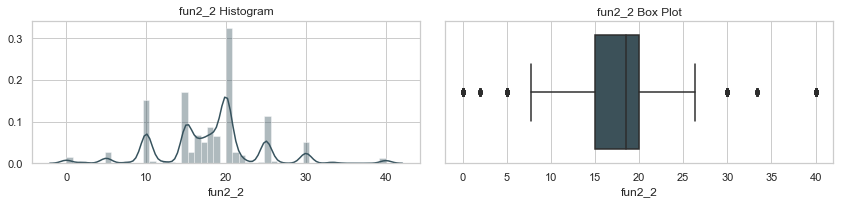

How Important is Ambition to Opposite Sex  - Day After Event


count  missing  min   25%       mean   50%    75%   max        sd  \
amb2_2  5775.0     2603  0.0  10.0  11.909735  10.0  15.09  50.0  0.462778   

            skew  kurtosis  normality_p  normality  
amb2_2 -0.818126  -1.33067          0.0  Reject H0

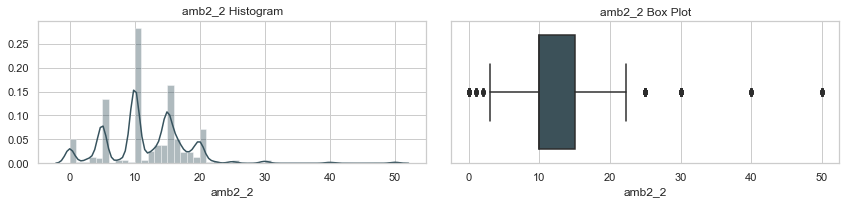

How Important is Shared Interests to Opposite Sex  - Day After Event


count  missing  min   25%       mean    50%     75%   max        sd  \
shar2_2  5775.0     2603  0.0  10.0  12.887976  13.95  16.515  30.0  0.462778   

             skew  kurtosis  normality_p  normality  
shar2_2 -0.818126  -1.33067          0.0  Reject H0

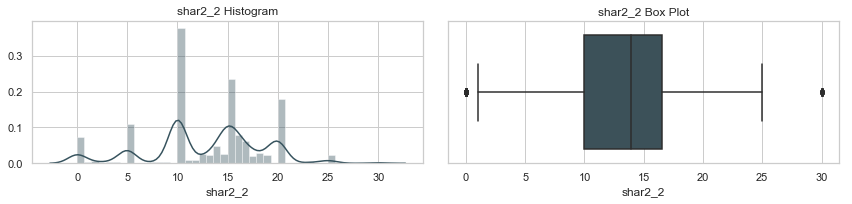

How Subject Measures Up to Attraction Preferences of Opposite Sex - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
attr3_2  7463.0      915  2.0  7.0  7.125285  7.0  8.0  10.0  0.311908   

             skew  kurtosis  normality_p  normality  
attr3_2 -2.505771  4.278889          0.0  Reject H0

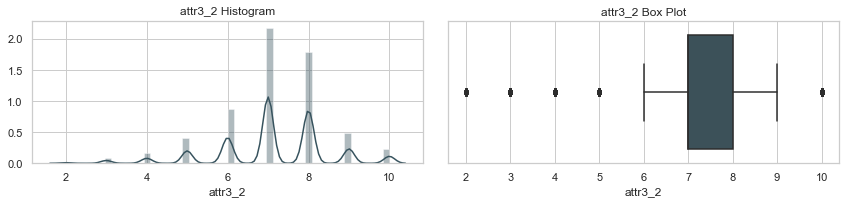

How Subject Measures Up to Sincerity Preferences of Opposite Sex - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
sinc3_2  7463.0      915  2.0  7.0  7.931529  8.0  9.0  10.0  0.311908   

             skew  kurtosis  normality_p  normality  
sinc3_2 -2.505771  4.278889          0.0  Reject H0

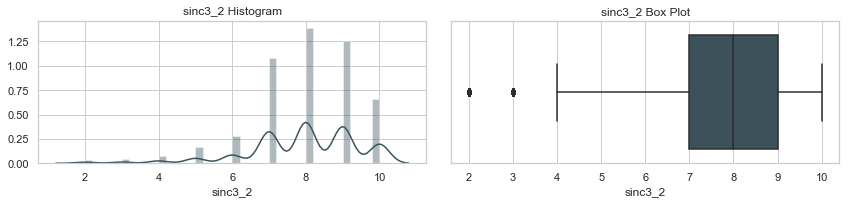

How Subject Measures Up to Intelligence Preferences of Opposite Sex - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
intel3_2  7463.0      915  4.0  8.0  8.238912  8.0  9.0  10.0  0.311908   

              skew  kurtosis  normality_p  normality  
intel3_2 -2.505771  4.278889          0.0  Reject H0

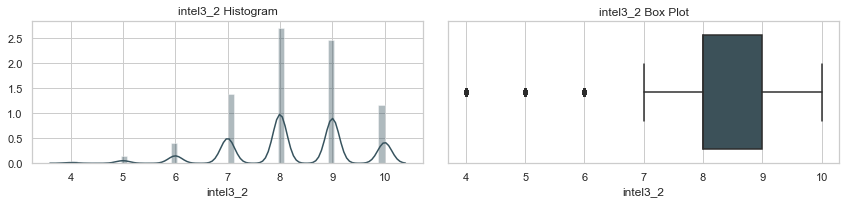

How Subject Measures Up to Funny Preferences of Opposite Sex - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
fun3_2  7463.0      915  1.0  7.0  7.602171  8.0  9.0  10.0  0.311908   

            skew  kurtosis  normality_p  normality  
fun3_2 -2.505771  4.278889          0.0  Reject H0

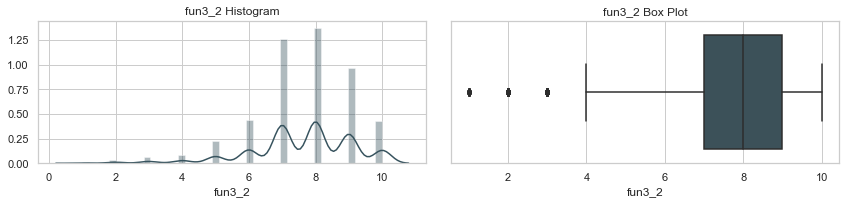

How Subject Measures Up to Ambition Preferences of Opposite Sex - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
amb3_2  7463.0      915  2.0  7.0  7.486802  8.0  9.0  10.0  0.311908   

            skew  kurtosis  normality_p  normality  
amb3_2 -2.505771  4.278889          0.0  Reject H0

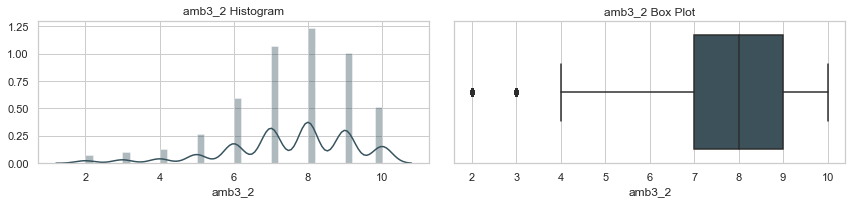

How Subject Thinks he/she is Perceived w.r.t. Attraction By Others - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
attr5_2  4377.0     4001  2.0  6.0  6.827964  7.0  8.0  10.0  0.499496   

             skew  kurtosis  normality_p  normality  
attr5_2 -0.089849 -1.991927          0.0  Reject H0

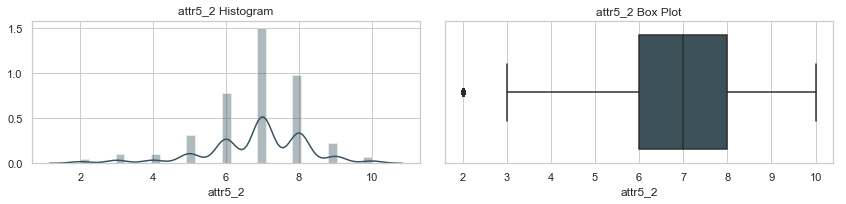

How Subject Thinks he/she is Perceived w.r.t. Sincerity By Others - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
sinc5_2  4377.0     4001  2.0  6.0  7.394106  8.0  8.0  10.0  0.499496   

             skew  kurtosis  normality_p  normality  
sinc5_2 -0.089849 -1.991927          0.0  Reject H0

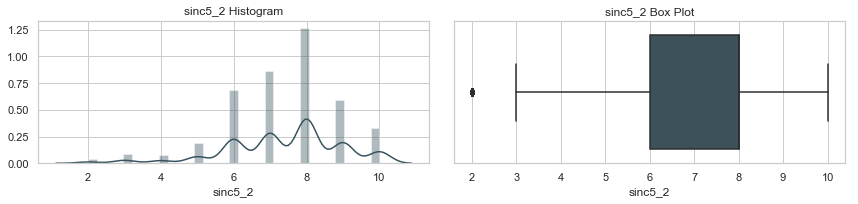

How Subject Thinks he/she is Perceived w.r.t. Intelligence By Others - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
intel5_2  4377.0     4001  2.0  7.0  7.838702  8.0  9.0  10.0  0.499496   

              skew  kurtosis  normality_p  normality  
intel5_2 -0.089849 -1.991927          0.0  Reject H0

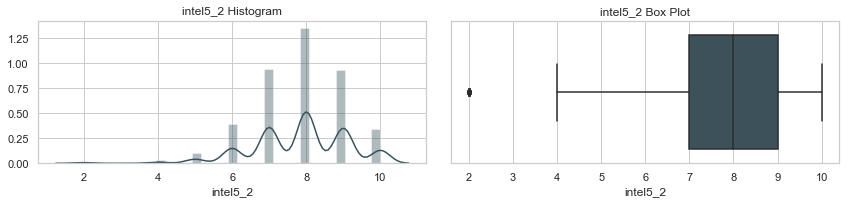

How Subject Thinks he/she is Perceived w.r.t. Funny By Others - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
fun5_2  4377.0     4001  2.0  6.0  7.279415  7.0  8.0  10.0  0.499496   

            skew  kurtosis  normality_p  normality  
fun5_2 -0.089849 -1.991927          0.0  Reject H0

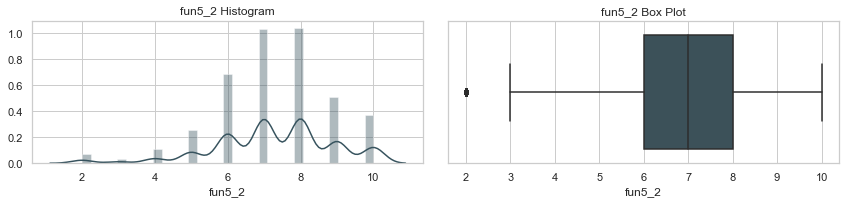

How Subject Thinks he/she is Perceived w.r.t. Ambition By Others - Day After Event


count  missing  min  25%      mean  50%  75%   max        sd  \
amb5_2  4377.0     4001  2.0  6.0  7.332191  7.0  8.0  10.0  0.499496   

            skew  kurtosis  normality_p  normality  
amb5_2 -0.089849 -1.991927          0.0  Reject H0

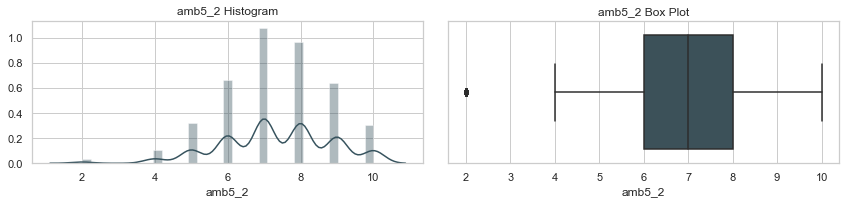

Number of Partners Contacted by Subject   -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%   max        sd  \
you_call  3974.0     4404  0.0  0.0  0.780825  0.0  1.0  21.0  0.499341   

              skew  kurtosis  normality_p  normality  
you_call  0.102785 -1.989435          0.0  Reject H0

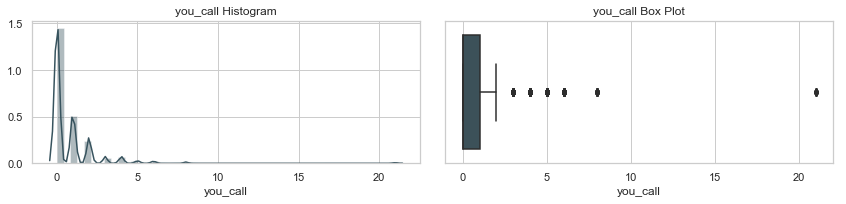

Number of Partners that Contacted Subject   -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%  max        sd  \
them_cal  3974.0     4404  0.0  0.0  0.981631  1.0  1.0  9.0  0.499341   

              skew  kurtosis  normality_p  normality  
them_cal  0.102785 -1.989435          0.0  Reject H0

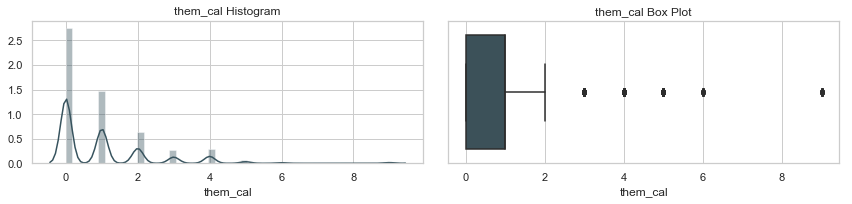

Has Subject Been on Any Dates with Matches - 3-4 Weeks After


count  missing  min  25%     mean  50%  75%  max        sd      skew  \
date_3  3974.0     4404  0.0  0.0  0.37695  0.0  1.0  1.0  0.499341  0.102785   

        kurtosis  normality_p  normality  
date_3 -1.989435          0.0  Reject H0

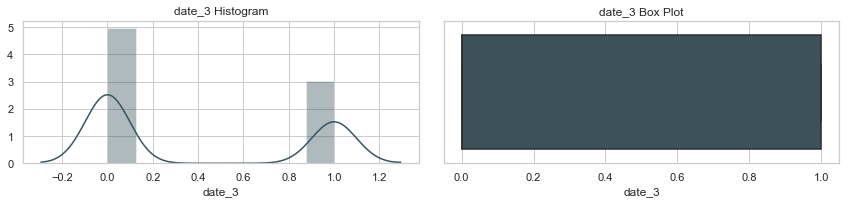

Number of Matches Subject has Dated   -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%  max        sd  \
numdat_3  1496.0     6882  0.0  1.0  1.230615  1.0  1.0  9.0  0.382986   

              skew  kurtosis  normality_p  normality  
numdat_3  1.678585  0.817646          0.0  Reject H0

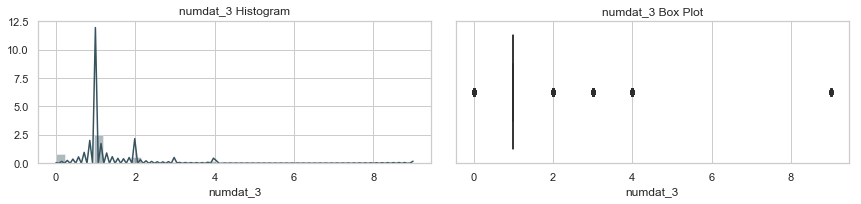

Number of Dates with Matches - 3-4 Weeks After


count  missing  min  25%      mean  50%  75%  max        sd  \
num_in_3  668.0     7710  0.0  1.0  0.934132  1.0  1.0  4.0  0.270879   

              skew  kurtosis  normality_p  normality  
num_in_3  3.102992  7.628557          0.0  Reject H0

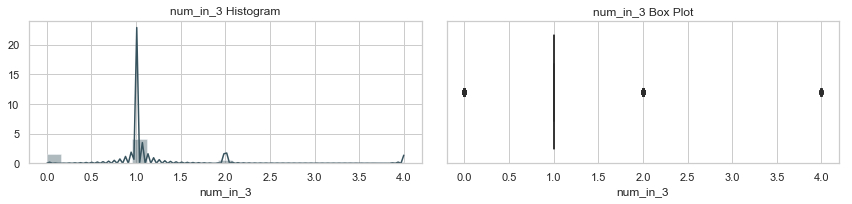

Importance of Attraction to Subject -3-4 Weeks After 


count  missing  min    25%       mean   50%   75%   max        sd  \
attr1_3  3974.0     4404  0.0  15.22  24.384524  20.0  30.0  80.0  0.499341   

             skew  kurtosis  normality_p  normality  
attr1_3  0.102785 -1.989435          0.0  Reject H0

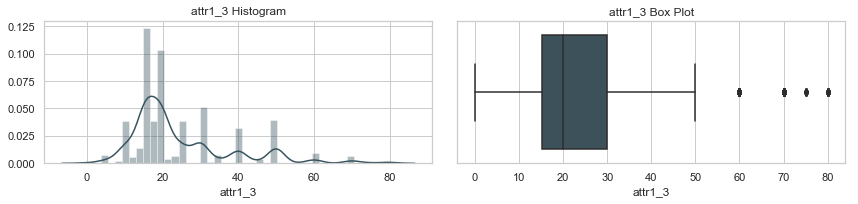

Importance of Sincerity to Subject -3-4 Weeks After 


count  missing  min   25%       mean    50%   75%   max        sd  \
sinc1_3  3974.0     4404  0.0  10.0  16.588583  16.67  20.0  65.0  0.499341   

             skew  kurtosis  normality_p  normality  
sinc1_3  0.102785 -1.989435          0.0  Reject H0

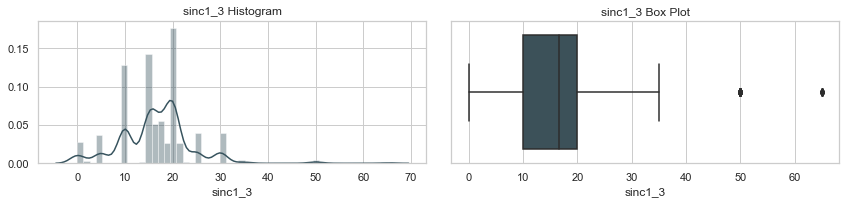

Importance of Intelligence to Subject -3-4 Weeks After 


count  missing  min    25%       mean   50%   75%   max        sd  \
intel1_3  3974.0     4404  0.0  16.67  19.411346  20.0  20.0  45.0  0.499341   

              skew  kurtosis  normality_p  normality  
intel1_3  0.102785 -1.989435          0.0  Reject H0

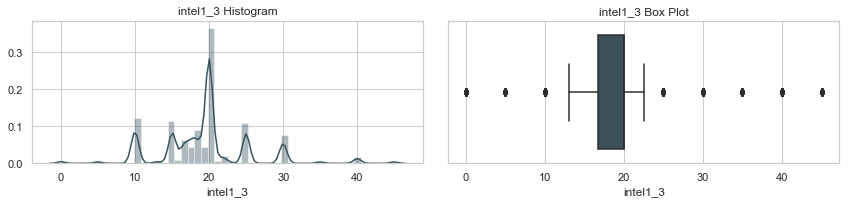

Importance of Funny to Subject -3-4 Weeks After 


count  missing  min    25%       mean    50%   75%   max        sd  \
fun1_3  3974.0     4404  0.0  14.81  16.233415  16.33  20.0  30.0  0.499341   

            skew  kurtosis  normality_p  normality  
fun1_3  0.102785 -1.989435          0.0  Reject H0

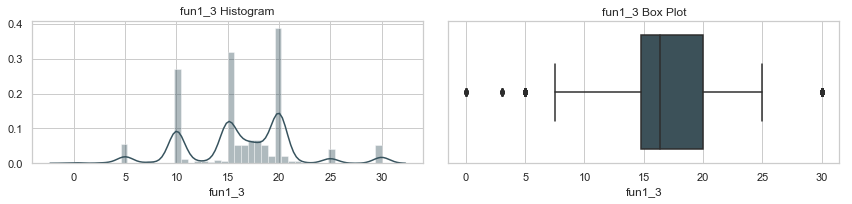

Importance of Ambition to Subject -3-4 Weeks After 


count  missing  min  25%       mean   50%   75%   max        sd  \
amb1_3  3974.0     4404  0.0  5.0  10.898075  10.0  15.0  30.0  0.499341   

            skew  kurtosis  normality_p  normality  
amb1_3  0.102785 -1.989435          0.0  Reject H0

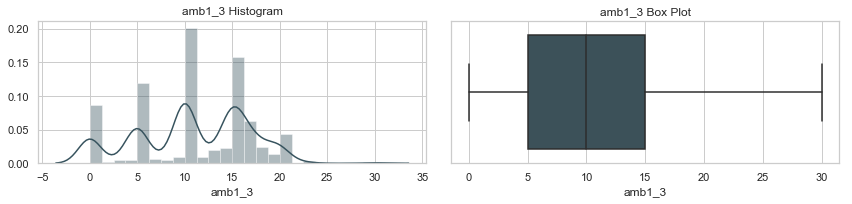

Importance of Shared Interests to Subject -3-4 Weeks After 


count  missing  min   25%       mean    50%    75%   max        sd  \
shar1_3  3974.0     4404  0.0  10.0  12.699142  14.29  16.67  55.0  0.499341   

             skew  kurtosis  normality_p  normality  
shar1_3  0.102785 -1.989435          0.0  Reject H0

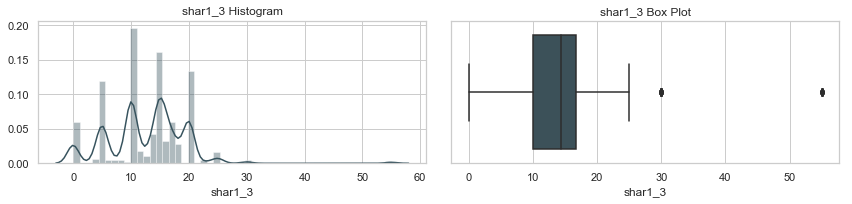

Importance of Attraction to Subject's Decision at Night of Event - 3-4 Weeks After 


count  missing  min   25%       mean   50%   75%   max        sd  \
attr7_3  2016.0     6362  0.0  20.0  31.330357  25.0  40.0  80.0  0.427466   

             skew  kurtosis  normality_p  normality  
attr7_3  1.213522 -0.527365          0.0  Reject H0

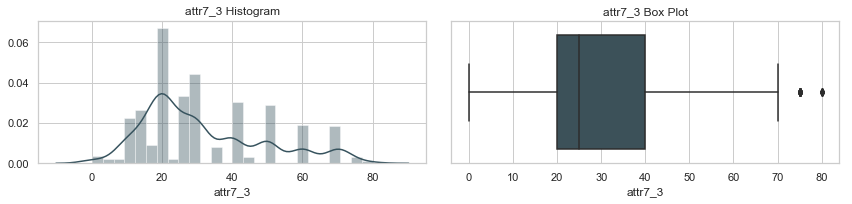

Importance of Sincerity to Subject's Decision at Night of Event - 3-4 Weeks After 


count  missing  min   25%       mean   50%   75%   max        sd  \
sinc7_3  2016.0     6362  0.0  10.0  15.654266  15.0  20.0  60.0  0.427466   

             skew  kurtosis  normality_p  normality  
sinc7_3  1.213522 -0.527365          0.0  Reject H0

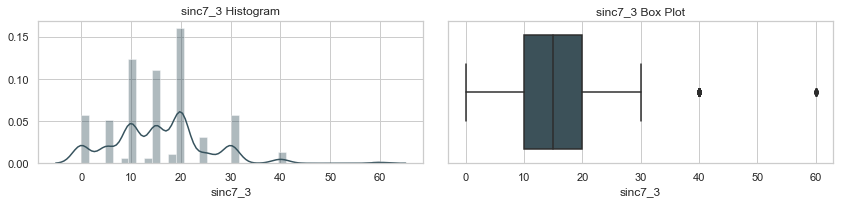

Importance of Intelligence to Subject's Decision at Night of Event - 3-4 Weeks After 


count  missing  min   25%       mean   50%   75%   max        sd  \
intel7_3  2016.0     6362  0.0  10.0  16.679563  18.0  20.0  45.0  0.427466   

              skew  kurtosis  normality_p  normality  
intel7_3  1.213522 -0.527365          0.0  Reject H0

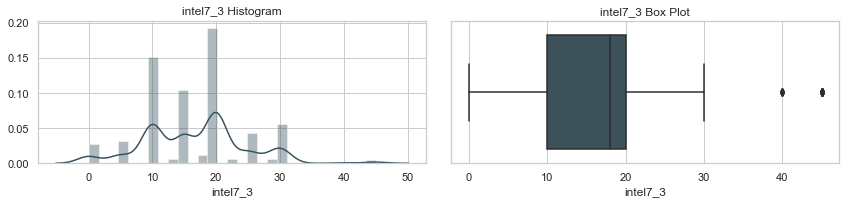

Importance of Funny to Subject's Decision at Night of Event - 3-4 Weeks After 


count  missing  min   25%       mean   50%   75%   max        sd  \
fun7_3  2016.0     6362  0.0  10.0  16.418155  17.0  20.0  40.0  0.427466   

            skew  kurtosis  normality_p  normality  
fun7_3  1.213522 -0.527365          0.0  Reject H0

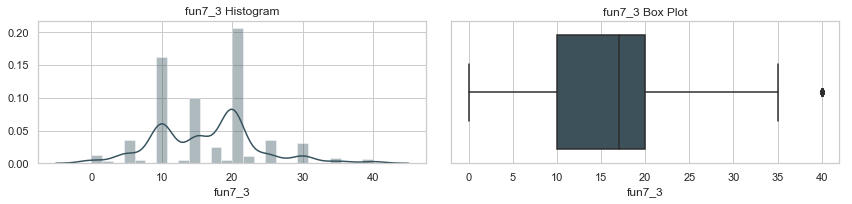

Importance of Ambition to Subject's Decision at Night of Event - 3-4 Weeks After 


count  missing  min  25%      mean   50%   75%   max        sd  \
amb7_3  2016.0     6362  0.0  0.0  7.823909  10.0  10.0  30.0  0.427466   

            skew  kurtosis  normality_p  normality  
amb7_3  1.213522 -0.527365          0.0  Reject H0

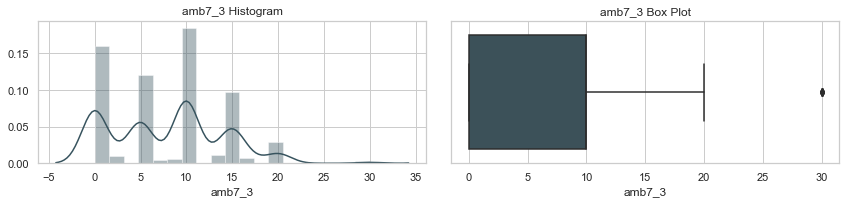

Importance of Shared Interests to Subject's Decision at Night of Event - 3-4 Weeks After 


count  missing  min  25%       mean   50%   75%   max        sd  \
shar7_3  2016.0     6362  0.0  5.0  12.207837  10.0  20.0  55.0  0.427466   

             skew  kurtosis  normality_p  normality  
shar7_3  1.213522 -0.527365          0.0  Reject H0

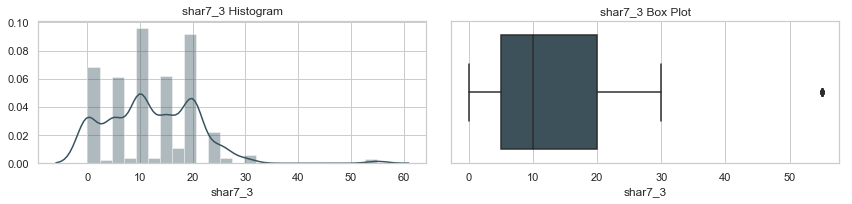

How Important is Attraction to Most other People -3-4 Weeks After 


count  missing  min   25%       mean   50%   75%   max       sd  \
attr4_3  2959.0     5419  0.0  10.0  25.610341  20.0  37.0  80.0  0.47796   

             skew  kurtosis  normality_p  normality  
attr4_3  0.614332 -1.622596          0.0  Reject H0

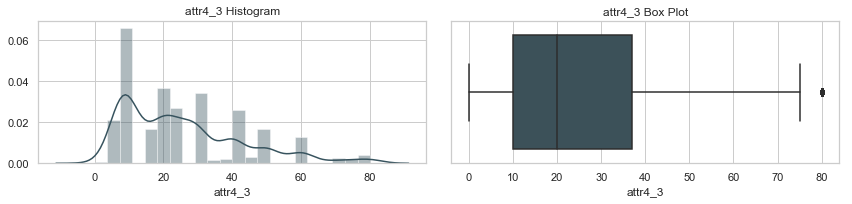

How Important is Sincerity to Most other People -3-4 Weeks After 


count  missing  min  25%       mean   50%   75%   max       sd  \
sinc4_3  2959.0     5419  0.0  7.0  10.751267  10.0  15.0  40.0  0.47796   

             skew  kurtosis  normality_p  normality  
sinc4_3  0.614332 -1.622596          0.0  Reject H0

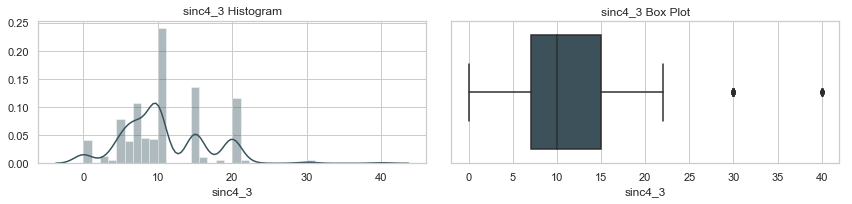

How Important is Intelligence to Most other People -3-4 Weeks After 


count  missing  min  25%       mean   50%   75%   max       sd  \
intel4_3  2959.0     5419  0.0  7.0  11.524839  10.0  15.0  30.0  0.47796   

              skew  kurtosis  normality_p  normality  
intel4_3  0.614332 -1.622596          0.0  Reject H0

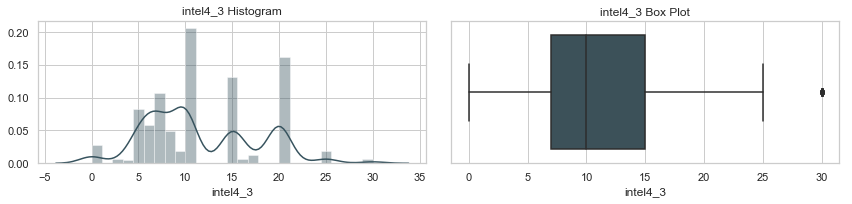

How Important is Funny to Most other People -3-4 Weeks After 


count  missing  min  25%       mean   50%   75%   max       sd  \
fun4_3  2959.0     5419  0.0  9.0  14.276783  12.0  20.0  30.0  0.47796   

            skew  kurtosis  normality_p  normality  
fun4_3  0.614332 -1.622596          0.0  Reject H0

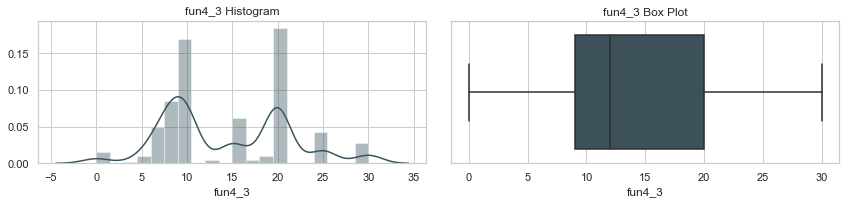

How Important is Ambition to Most other People -3-4 Weeks After 


count  missing  min  25%      mean  50%   75%   max       sd  \
amb4_3  2959.0     5419  0.0  5.0  9.207503  9.0  10.0  40.0  0.47796   

            skew  kurtosis  normality_p  normality  
amb4_3  0.614332 -1.622596          0.0  Reject H0

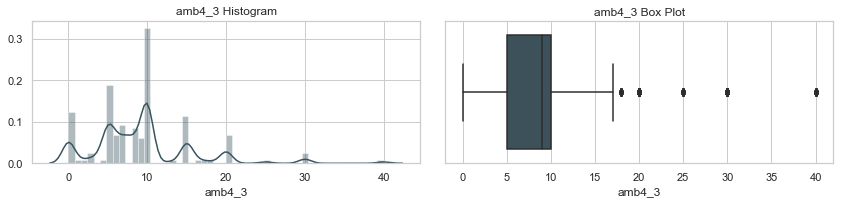

How Important is Shared Interests to Most other People -3-4 Weeks After 


count  missing  min  25%       mean   50%   75%   max       sd  \
shar4_3  2959.0     5419  0.0  7.0  11.253802  10.0  15.0  45.0  0.47796   

             skew  kurtosis  normality_p  normality  
shar4_3  0.614332 -1.622596          0.0  Reject H0

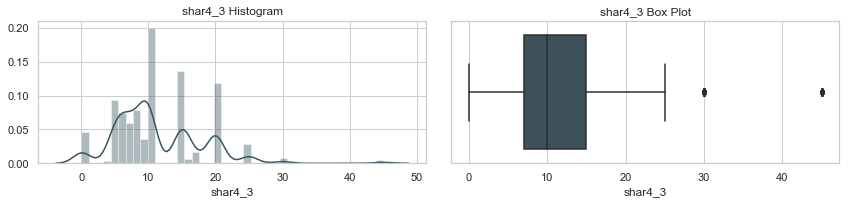

How Important is Attraction to Opposite Sex  -3-4 Weeks After 


count  missing  min   25%       mean   50%   75%   max       sd  \
attr2_3  2959.0     5419  5.0  10.0  24.970936  20.0  35.0  80.0  0.47796   

             skew  kurtosis  normality_p  normality  
attr2_3  0.614332 -1.622596          0.0  Reject H0

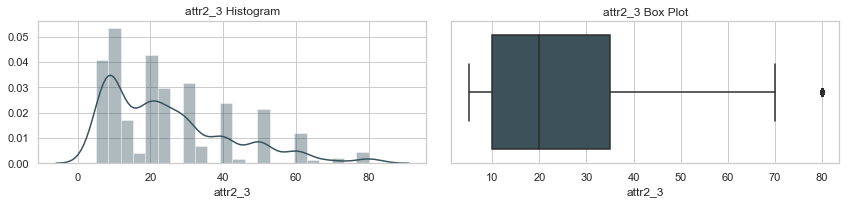

How Important is Sincerity to Opposite Sex  -3-4 Weeks After 


count  missing  min  25%       mean   50%   75%   max       sd  \
sinc2_3  2959.0     5419  0.0  7.0  10.923285  10.0  15.0  50.0  0.47796   

             skew  kurtosis  normality_p  normality  
sinc2_3  0.614332 -1.622596          0.0  Reject H0

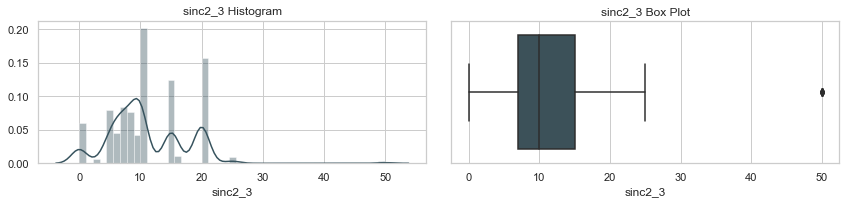

How Important is Intelligence to Opposite Sex  -3-4 Weeks After 


count  missing  min  25%       mean   50%   75%   max       sd  \
intel2_3  2959.0     5419  0.0  7.0  11.952687  10.0  15.0  60.0  0.47796   

              skew  kurtosis  normality_p  normality  
intel2_3  0.614332 -1.622596          0.0  Reject H0

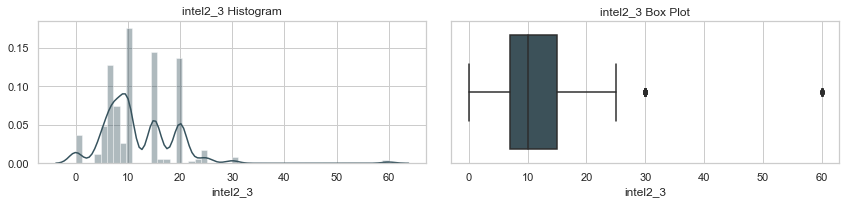

How Important is Funny to Opposite Sex  -3-4 Weeks After 


count  missing  min  25%       mean   50%   75%   max       sd  \
fun2_3  2959.0     5419  0.0  9.0  14.959108  15.0  20.0  40.0  0.47796   

            skew  kurtosis  normality_p  normality  
fun2_3  0.614332 -1.622596          0.0  Reject H0

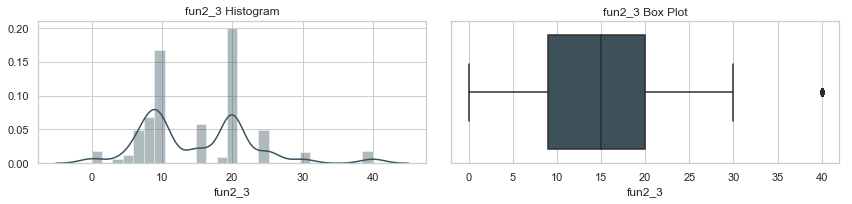

How Important is Ambition to Opposite Sex  -3-4 Weeks After 


count  missing  min  25%      mean   50%   75%   max       sd  \
amb2_3  2959.0     5419  0.0  6.0  9.526191  10.0  10.0  50.0  0.47796   

            skew  kurtosis  normality_p  normality  
amb2_3  0.614332 -1.622596          0.0  Reject H0

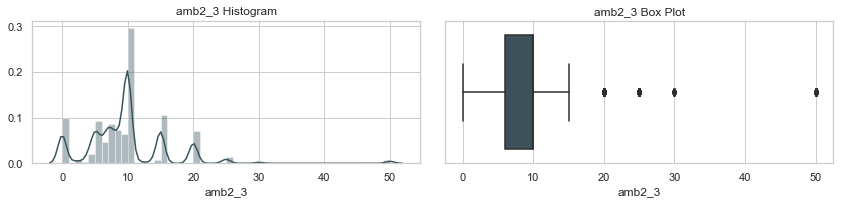

How Important is Shared Interests to Opposite Sex  -3-4 Weeks After 


count  missing  min  25%      mean   50%   75%   max        sd  \
shar2_3  2016.0     6362  0.0  5.0  11.96627  10.0  15.0  45.0  0.427466   

             skew  kurtosis  normality_p  normality  
shar2_3  1.213522 -0.527365          0.0  Reject H0

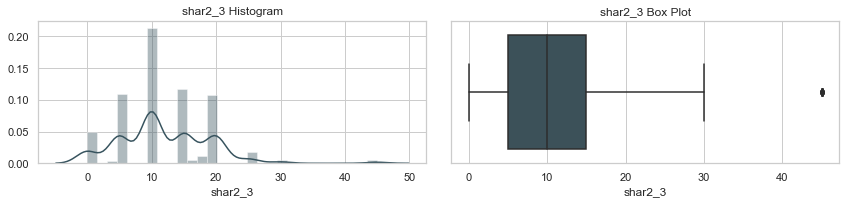

Subject Self Rating on Attraction  -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%   max        sd  \
attr3_3  3974.0     4404  2.0  7.0  7.240312  7.0  8.0  12.0  0.499341   

             skew  kurtosis  normality_p  normality  
attr3_3  0.102785 -1.989435          0.0  Reject H0

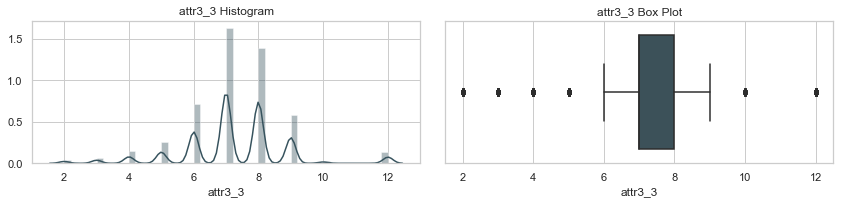

Subject Self Rating on Sincerity  -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%   max        sd  \
sinc3_3  3974.0     4404  2.0  7.0  8.093357  8.0  9.0  12.0  0.499341   

             skew  kurtosis  normality_p  normality  
sinc3_3  0.102785 -1.989435          0.0  Reject H0

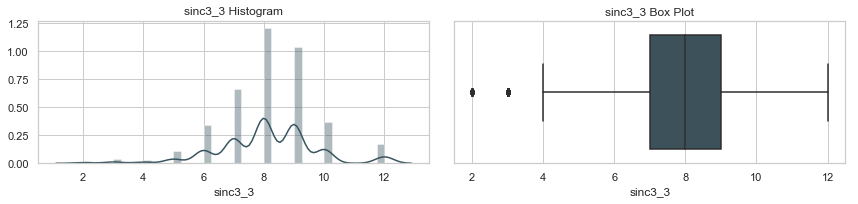

Subject Self Rating on Intelligence  -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%   max        sd  \
intel3_3  3974.0     4404  3.0  8.0  8.388777  8.0  9.0  12.0  0.499341   

              skew  kurtosis  normality_p  normality  
intel3_3  0.102785 -1.989435          0.0  Reject H0

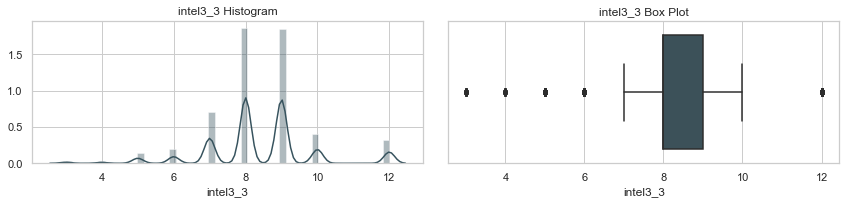

Subject Self Rating on Funny  -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%   max        sd  \
fun3_3  3974.0     4404  2.0  7.0  7.658782  8.0  9.0  12.0  0.499341   

            skew  kurtosis  normality_p  normality  
fun3_3  0.102785 -1.989435          0.0  Reject H0

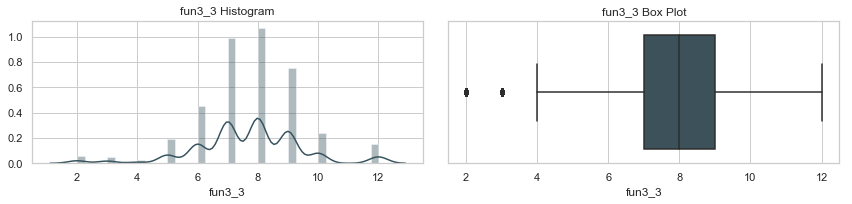

Subject Self Rating on Ambition  -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%   max        sd  \
amb3_3  3974.0     4404  1.0  6.0  7.391545  8.0  9.0  12.0  0.499341   

            skew  kurtosis  normality_p  normality  
amb3_3  0.102785 -1.989435          0.0  Reject H0

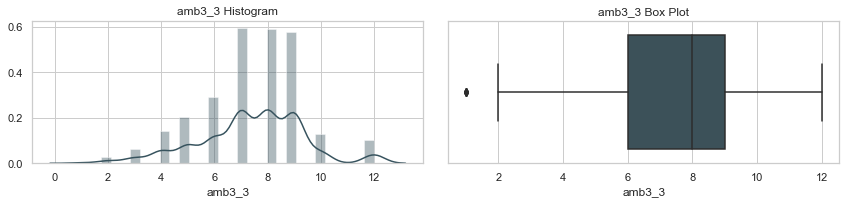

Subject's Opinion on Perception of Others w.r.t. Attraction  -3-4 Weeks After 


count  missing  min  25%     mean  50%  75%   max        sd  \
attr5_3  2016.0     6362  2.0  6.0  6.81002  7.0  8.0  10.0  0.427466   

             skew  kurtosis  normality_p  normality  
attr5_3  1.213522 -0.527365          0.0  Reject H0

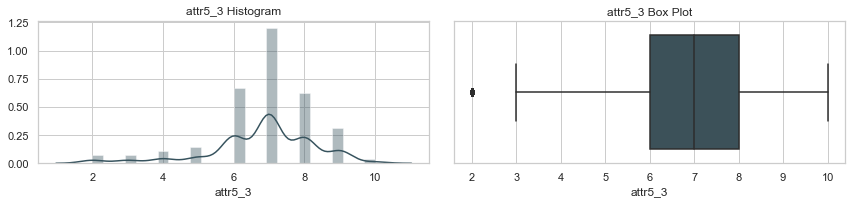

Subject's Opinion on Perception of Others w.r.t. Sincerity  -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%   max        sd  \
sinc5_3  2016.0     6362  2.0  7.0  7.615079  8.0  9.0  10.0  0.427466   

             skew  kurtosis  normality_p  normality  
sinc5_3  1.213522 -0.527365          0.0  Reject H0

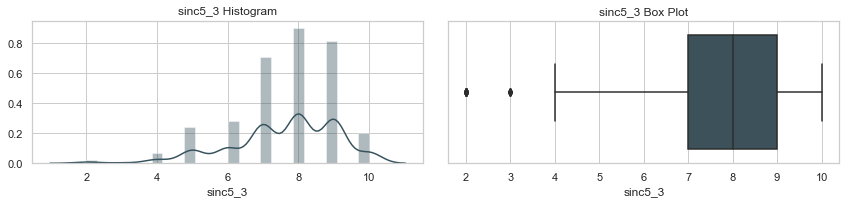

Subject's Opinion on Perception of Others w.r.t. Intelligence  -3-4 Weeks After 


count  missing  min  25%     mean  50%  75%   max        sd  \
intel5_3  2016.0     6362  4.0  7.0  7.93254  8.0  9.0  10.0  0.427466   

              skew  kurtosis  normality_p  normality  
intel5_3  1.213522 -0.527365          0.0  Reject H0

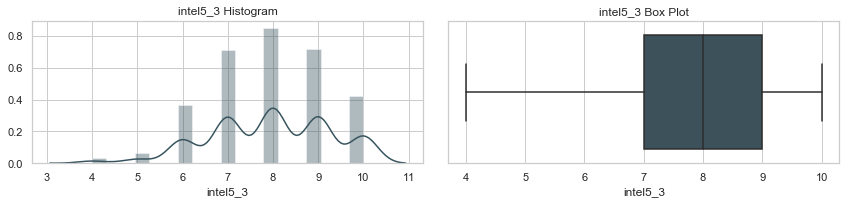

Subject's Opinion on Perception of Others w.r.t. Funny  -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%   max        sd  \
fun5_3  2016.0     6362  1.0  6.0  7.155258  7.0  8.0  10.0  0.427466   

            skew  kurtosis  normality_p  normality  
fun5_3  1.213522 -0.527365          0.0  Reject H0

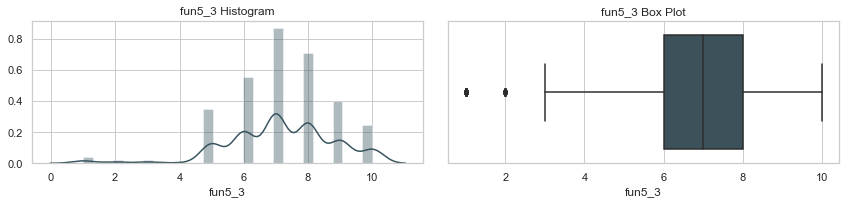

Subject's Opinion on Perception of Others w.r.t. Ambition  -3-4 Weeks After 


count  missing  min  25%      mean  50%  75%   max        sd  \
amb5_3  2016.0     6362  1.0  6.0  7.048611  7.0  8.0  10.0  0.427466   

            skew  kurtosis  normality_p  normality  
amb5_3  1.213522 -0.527365          0.0  Reject H0

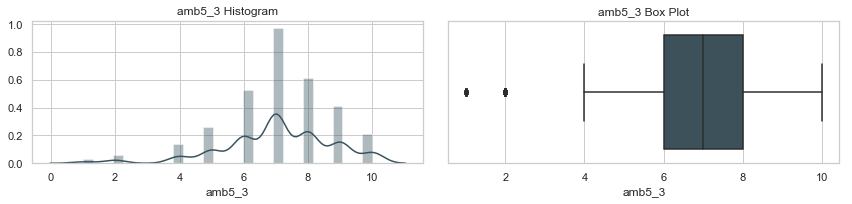

In [5]:
for col, desc in zip(columns.field, columns.description):    
    d, v = univariate.analysis(df[[col]])
    print(visual.color.BOLD + desc + visual.color.END)
    d
    v
    plt.show()